# 2023年E题-黄河小浪底泥沙


## 1. 数据预处理

### 1.1 数据读取
- 采用fillna()函数进行数据预处理
  1. 对“年” “月” “日” 三列进行空缺值填充
- 采用线性插值法进行数据预处理
  1. 对“含沙量”列进行空缺值填充
- 采用Z-score法去除"含沙量(kg/m3) "列的异常值
- 对"含沙量(kg/m3) "列数据进行异常值处理

### 1.2 数据合并
- 导入每一年的数据，并将其合并为一个数据all_data.csv 文件方便后续分析

In [617]:
# 导入数据
from this import d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号
# 导入数据
df = pd.read_excel('附件1.xlsx')
data1 = pd.read_excel('./附件1.xlsx', sheet_name='2016')
print("数据中的列名:", data1.columns.tolist())
data1 = data1[['年','月','日','时间','水位(m)','流量(m3/s)',"含沙量(kg/m3) "]]
data1["年"].fillna(method='ffill', inplace=True)
data1["月"].fillna(method='ffill', inplace=True)
data1["日"].fillna(method='ffill', inplace=True)
data2 = pd.read_excel('./附件1.xlsx', sheet_name='2017')
data2 = data2[['年','月','日','时间','水位(m)','流量(m3/s)',"含沙量(kg/m3) "]]
data2["年"].fillna(method='ffill', inplace=True)
data2["月"].fillna(method='ffill', inplace=True)
data2["日"].fillna(method='ffill', inplace=True)
data3 = pd.read_excel('./附件1.xlsx', sheet_name='2018')
data3 = data3[['年','月','日','时间','水位(m)','流量(m3/s)',"含沙量(kg/m3) "]]
data3["年"].fillna(method='ffill', inplace=True)
data3["月"].fillna(method='ffill', inplace=True)
data3["日"].fillna(method='ffill', inplace=True)
data4 = pd.read_excel('./附件1.xlsx', sheet_name='2019')
data4 = data4[['年','月','日','时间','水位(m)','流量(m3/s)',"含沙量(kg/m3) "]]
data4["年"].fillna(method='ffill', inplace=True)
data4["月"].fillna(method='ffill', inplace=True)
data4["日"].fillna(method='ffill', inplace=True)
data5 = pd.read_excel('./附件1.xlsx', sheet_name='2020')
data5 = data5[['年','月','日','时间','水位(m)','流量(m3/s)',"含沙量(kg/m3) "]]
data5["年"].fillna(method='ffill', inplace=True)
data5["月"].fillna(method='ffill', inplace=True)
data5["日"].fillna(method='ffill', inplace=True)
data6 = pd.read_excel('./附件1.xlsx', sheet_name='2021')
data6 = data6[['年','月','日','时间','水位(m)','流量(m3/s)',"含沙量(kg/m3) "]]
data6["年"].fillna(method='ffill', inplace=True)
data6["月"].fillna(method='ffill', inplace=True)
data6["日"].fillna(method='ffill', inplace=True)

# 采用线性插值对"含沙量(kg/m3) "列缺失值进行填补
data1["含沙量(kg/m3) "] = data1["含沙量(kg/m3) "].interpolate()
data2["含沙量(kg/m3) "] = data2["含沙量(kg/m3) "].interpolate()
data3["含沙量(kg/m3) "] = data3["含沙量(kg/m3) "].interpolate()
data4["含沙量(kg/m3) "] = data4["含沙量(kg/m3) "].interpolate()
data5["含沙量(kg/m3) "] = data5["含沙量(kg/m3) "].interpolate()
data6["含沙量(kg/m3) "] = data6["含沙量(kg/m3) "].interpolate()

# # 采用IQR法去除"含沙量(kg/m3) "列的异常值
# def remove_outliers(data):
#     Q1 = data["含沙量(kg/m3) "].quantile(0.25)
#     Q3 = data["含沙量(kg/m3) "].quantile(0.75)
#     IQR = Q3 - Q1
#     data = data[(data["含沙量(kg/m3) "] >= Q1 - 1.5 * IQR) & (data["含沙量(kg/m3) "] <= Q3 + 1.5 * IQR)]
#     return data

# # 对"含沙量(kg/m3) "列数据进行异常值处理
# data1 = remove_outliers(data1)
# data2 = remove_outliers(data2)
# data3 = remove_outliers(data3)
# data4 = remove_outliers(data4)
# data5 = remove_outliers(data5)
# data6 = remove_outliers(data6)

# 采用Z-score法去除"含沙量(kg/m3) "列的异常值
def remove_outliers(data):
    z_scores = stats.zscore(data["含沙量(kg/m3) "])
    data = data[(z_scores < 3) & (z_scores > -3)]
    return data

# 对"含沙量(kg/m3) "列数据进行异常值处理
data1 = remove_outliers(data1)
data2 = remove_outliers(data2)
data3 = remove_outliers(data3)
data4 = remove_outliers(data4)
data5 = remove_outliers(data5)
data6 = remove_outliers(data6)

# 计算排沙量
data1['排沙量'] = data1['流量(m3/s)'] * data1['含沙量(kg/m3) ']
data2['排沙量'] = data2['流量(m3/s)'] * data2['含沙量(kg/m3) ']
data3['排沙量'] = data3['流量(m3/s)'] * data3['含沙量(kg/m3) ']
data4['排沙量'] = data4['流量(m3/s)'] * data4['含沙量(kg/m3) ']
data5['排沙量'] = data5['流量(m3/s)'] * data5['含沙量(kg/m3) ']
data6['排沙量'] = data6['流量(m3/s)'] * data6['含沙量(kg/m3) ']

all_data = pd.concat([data1, data2, data3, data4, data5, data6],axis=0)
all_data.to_csv('all_data.csv',index=None)






数据中的列名: ['年', '月', '日', '时间', '水位(m)', '流量(m3/s)', '含沙量(kg/m3) ']


# 问题一

## 研究该水文站黄河水的含沙量与时间、水位、水流量的关系，并估算近 6 年该水文站的年总水流量和年总排沙量。


### 第一小问：分析时间、水位、水流量与含沙量的相关性

- 通过Spearman相关性分析，进行时间、水位、水流量与含沙量的相关性分析，并且绘制热力图，发现时间、水位、水流量与含沙量的相关性均为 0.55 左右，且时间、水位、水流量与含沙量的相关性均为正相关。


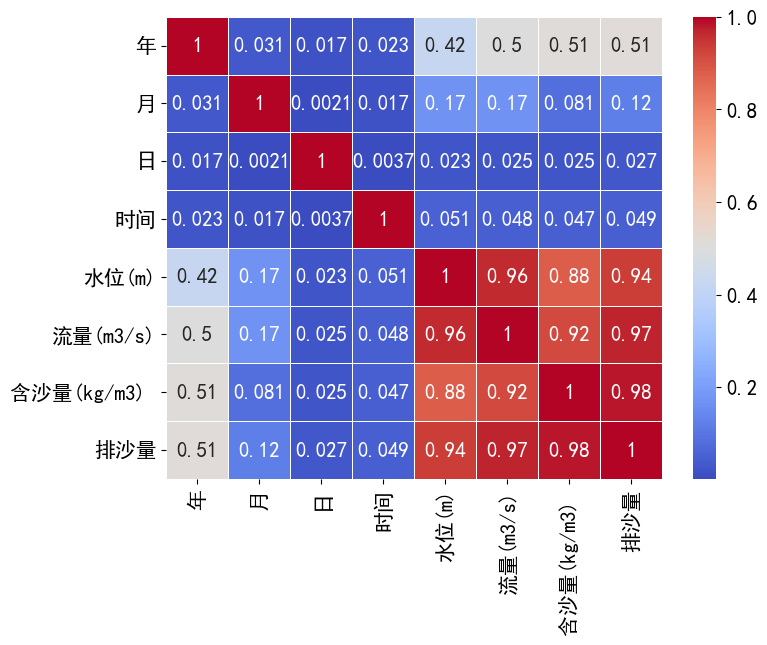

In [618]:
from scipy.stats import spearmanr

# 读取 CSV 文件
df = pd.read_csv('all_data.csv')

# 查找并处理时间格式的列
for column in df.columns:
    # 检查是否包含时间格式的字符串
    if df[column].dtype == 'object' and df[column].str.contains(':').any():
        # 将时间转换为分钟数
        try:
            df[column] = df[column].apply(lambda x: 
                                         int(x.split(':')[0])*60 + int(x.split(':')[1]) 
                                         if ':' in str(x) else x)
        except:
            # 如果转换失败，将该列排除在分析之外
            print(f"列 '{column}' 包含无法转换的时间格式，已排除")
            df[column] = pd.to_numeric(df[column], errors='coerce')

# 计算Spearman相关系数矩阵
correlation_matrix = df.corr(method='spearman')

# 绘制Spearman热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.savefig(f'F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\spearman.png')
plt.show()





#### 1.1.1 分析该水文站黄河水的含沙量与时间的关系

- 将数据整合成一个列表
- 分别绘制每年的含沙量与时间的关系图

In [619]:
data_list = [data1, data2, data3, data4, data5, data6]
data_list


[           年     月     日     时间  水位(m)  流量(m3/s)  含沙量(kg/m3)          排沙量
 0     2016.0   1.0   1.0   0:00  42.79       357     0.825000  294.525000
 1     2016.0   1.0   1.0   4:00  42.80       363     0.810500  294.211500
 2     2016.0   1.0   1.0   8:00  42.80       363     0.796000  288.948000
 3     2016.0   1.0   1.0  12:00  42.81       368     0.802286  295.241143
 4     2016.0   1.0   1.0  14:00  42.84       384     0.808571  310.491429
 ...      ...   ...   ...    ...    ...       ...          ...         ...
 2375  2016.0  12.0  31.0   2:00  42.19       217     0.367800   79.812600
 2376  2016.0  12.0  31.0   8:00  42.19       217     0.356000   77.252000
 2377  2016.0  12.0  31.0  14:00  42.17       213     0.391000   83.283000
 2378  2016.0  12.0  31.0  20:00  42.18       215     0.426000   91.590000
 2379  2016.0  12.0  31.0  24:00  42.18       215     0.461000   99.115000
 
 [2355 rows x 8 columns],
            年     月     日     时间  水位(m)  流量(m3/s)  含沙量(kg/m3)        排沙量

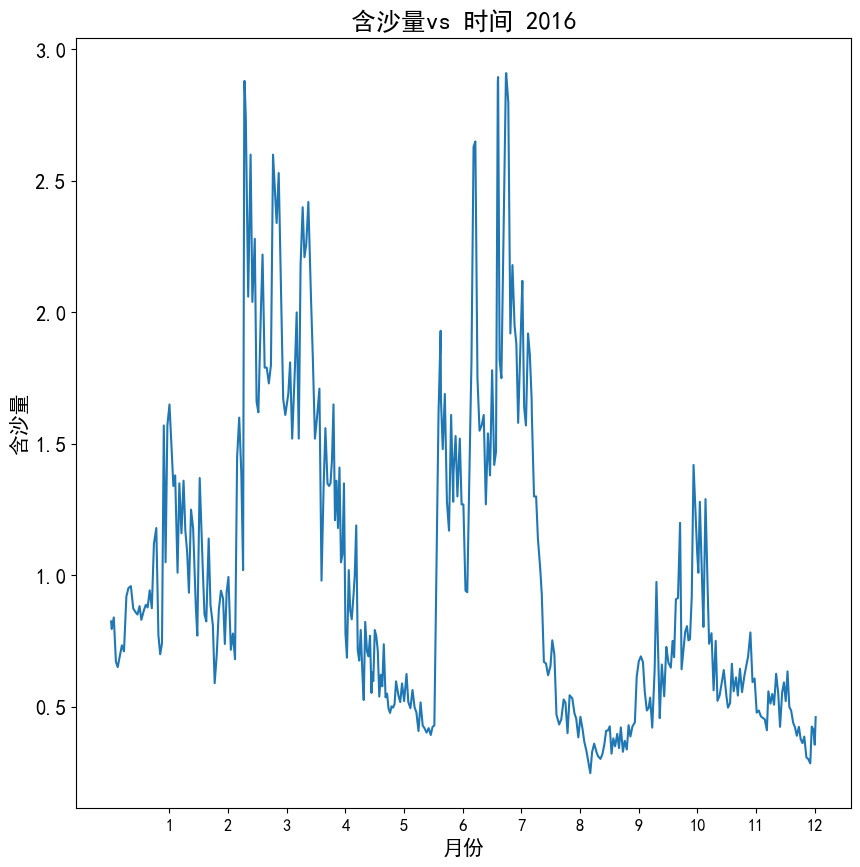

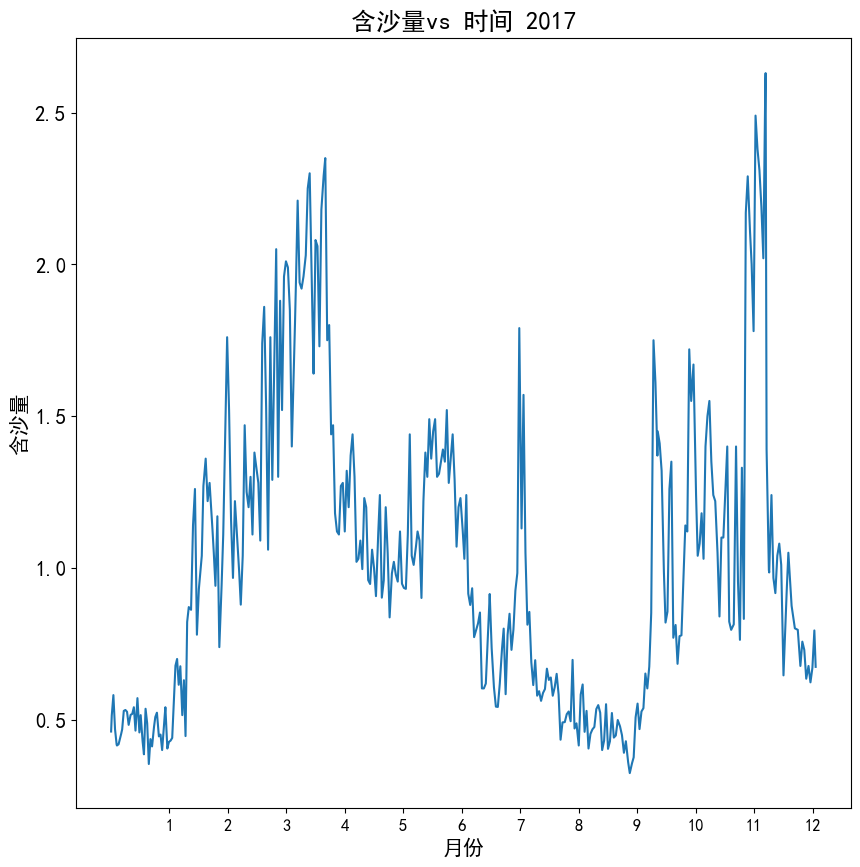

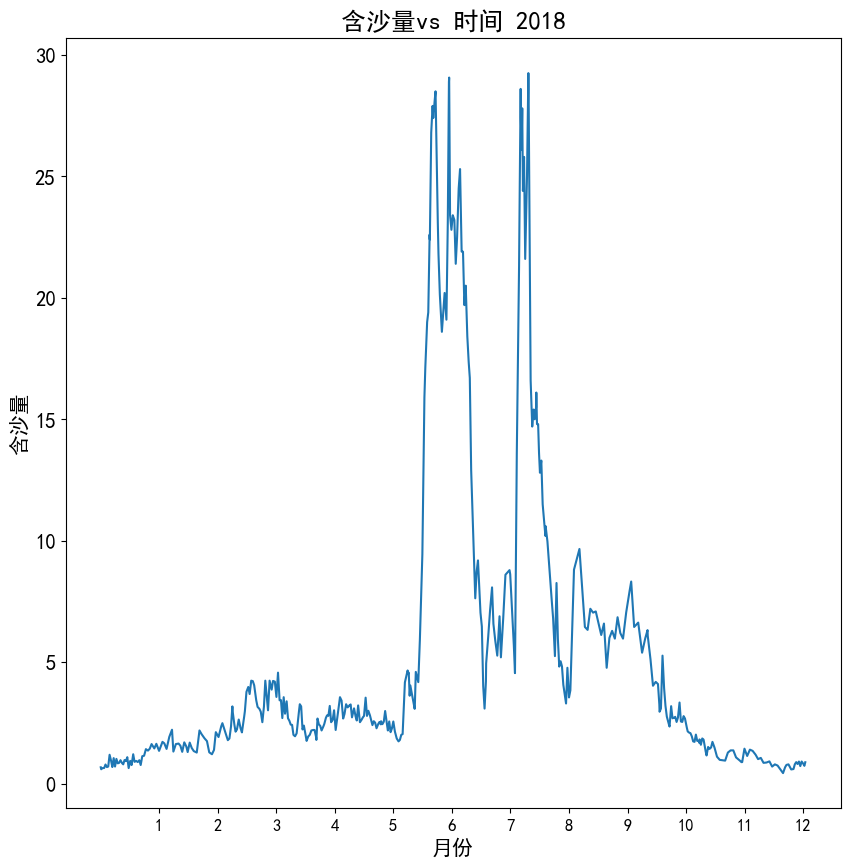

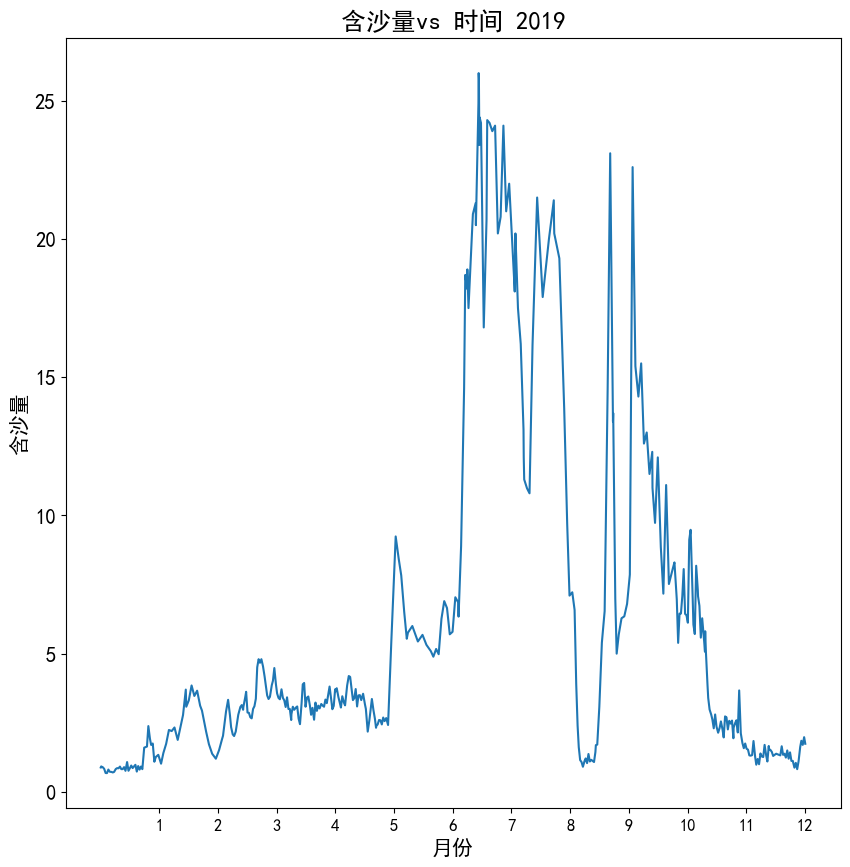

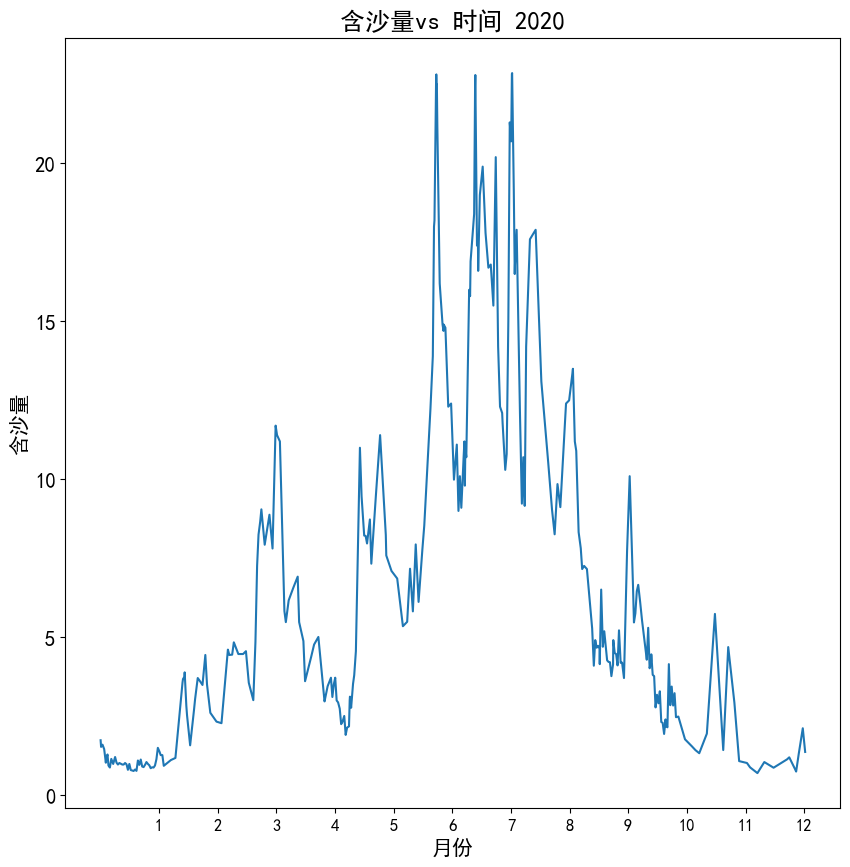

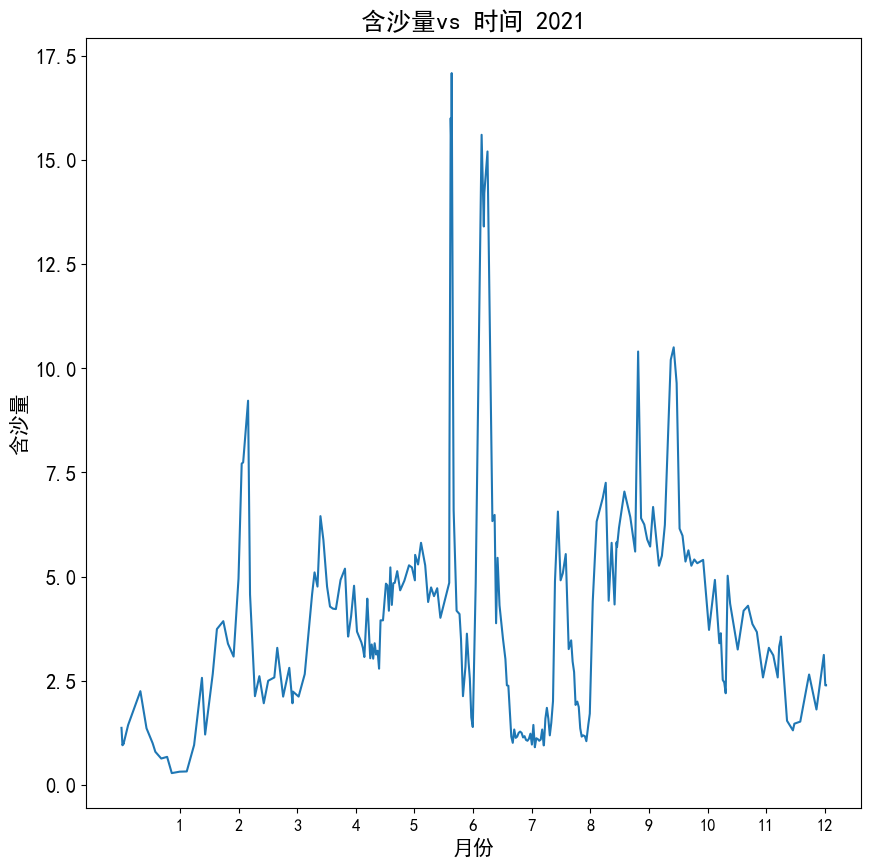

In [620]:
Y = 2016 # 年份初始值
for df in data_list: # 遍历列表中的数据
    plt.figure() # 新建图
    ax = plt.subplot() # 创建子图
    n = df.shape[0] # 取行数
    ax.plot(np.arange(1, n+1), df['含沙量(kg/m3) ']) # 画出含沙量随时间变化的折线图
    # 设置主刻度的范围， 这里是从1到n+1, n+1是为了让最后一个点显示出来
    # ticks在原数据的范围内,设定主刻度的位置
    ax.set_xticks([n//12, (n//12)*2, (n//12)*3, (n//12)*4, (n//12)*5, (n//12)*6, (n//12)*7,(n//12)*8,(n//12)*9,(n//12)*10,(n//12)*11,(n//12)*12])
    # 设置主刻度的标签， 带入主刻度旋转角度和字体大小参数
    ax.set_xticklabels(['1', '2','3', '4', '5','6','7','8','9','10','11','12'], fontsize=12) # 设置x轴刻度标签
    # 设置x轴的范围， 这里是从1到n+1, n+1是为了让最后一个点显示出来

    ax.set_xlabel('月份') # 设置x轴标签
    ax.set_ylabel('含沙量') # 设置y轴标签
    ax.set_title('含沙量vs 时间 '+str(Y)) # 设置图标题
    # 设置图标题， 这里是从2016到2021年
    ax.figure.savefig(f'F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\sand_vs_time'+str(Y)+'.png') # 保存图片
    Y += 1 # 年份加1

#### 1.1.2 分析流量与含沙量的关系

- 建立双对数函数模型对数据进行拟合
- ln(流量) = a + b * ln(含沙量)
- 计算拟合优度R2

年份: 2016
截距: -6.370609292562181
系数: 1.0334723628215954
R²: 0.6363448072729154
截距的p值: 0.0000
斜率的p值: 0.0000


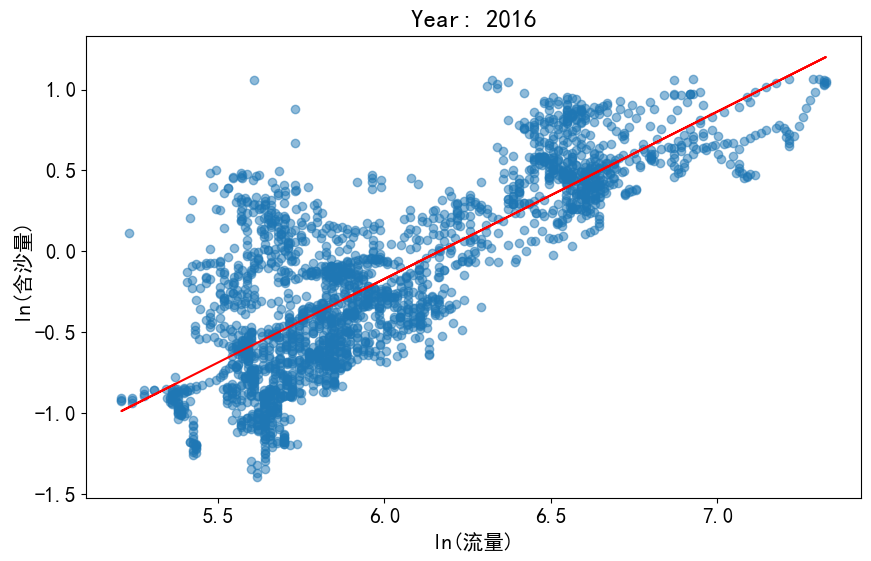

年份: 2017
截距: -5.582460607957966
系数: 0.9034255030960802
R²: 0.7782598988247584
截距的p值: 0.0000
斜率的p值: 0.0000


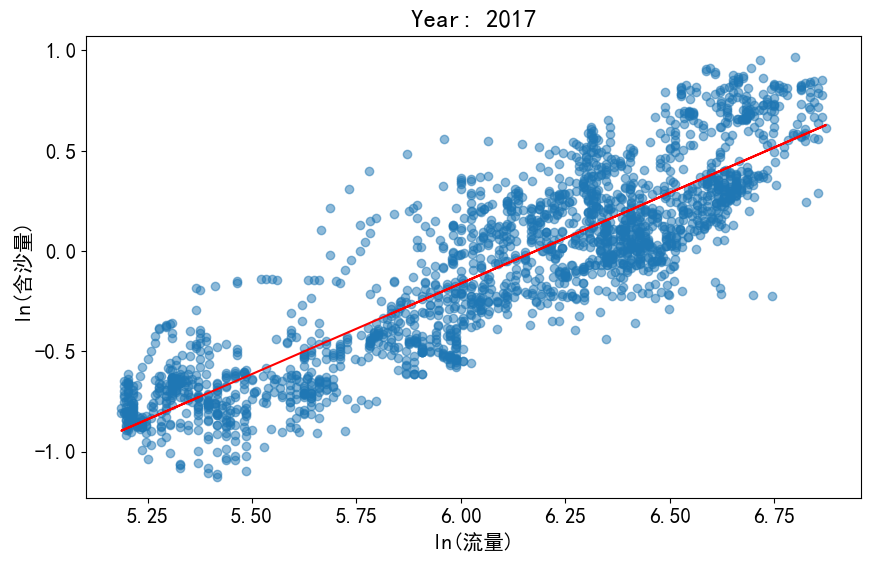

年份: 2018
截距: -6.93316412822575
系数: 1.158226829989024
R²: 0.7077388606290932
截距的p值: 0.0000
斜率的p值: 0.0000


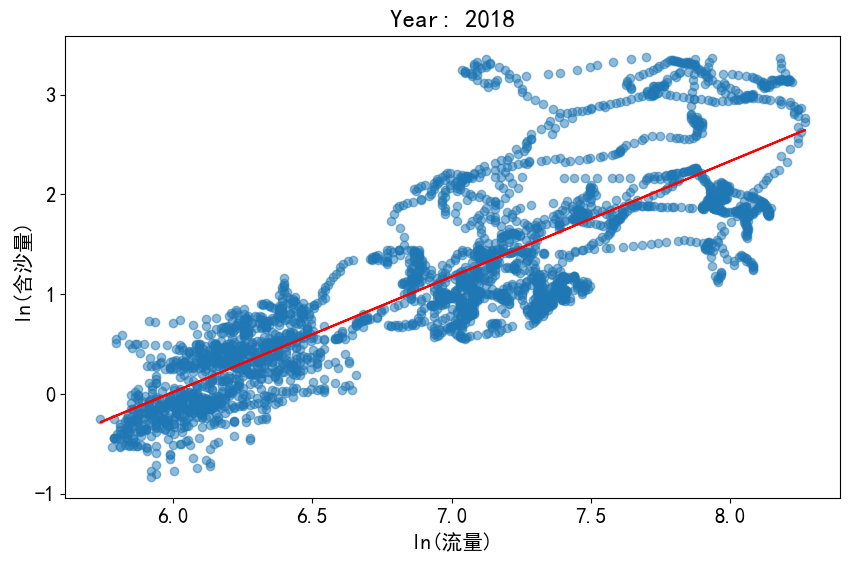

年份: 2019
截距: -6.309352119727009
系数: 1.09427380416329
R²: 0.722298840630065
截距的p值: 0.0000
斜率的p值: 0.0000


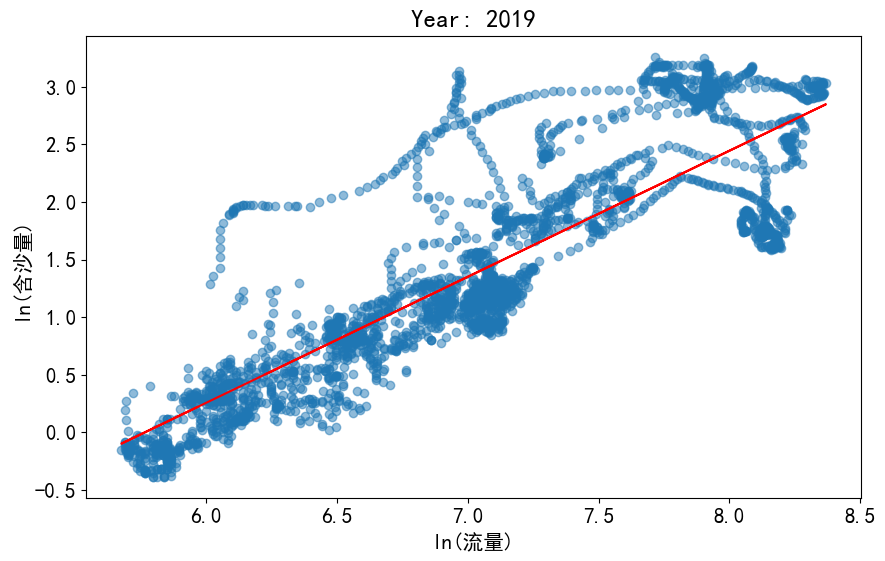

年份: 2020
截距: -5.918098178095066
系数: 1.03409871520175
R²: 0.7642397766308289
截距的p值: 0.0000
斜率的p值: 0.0000


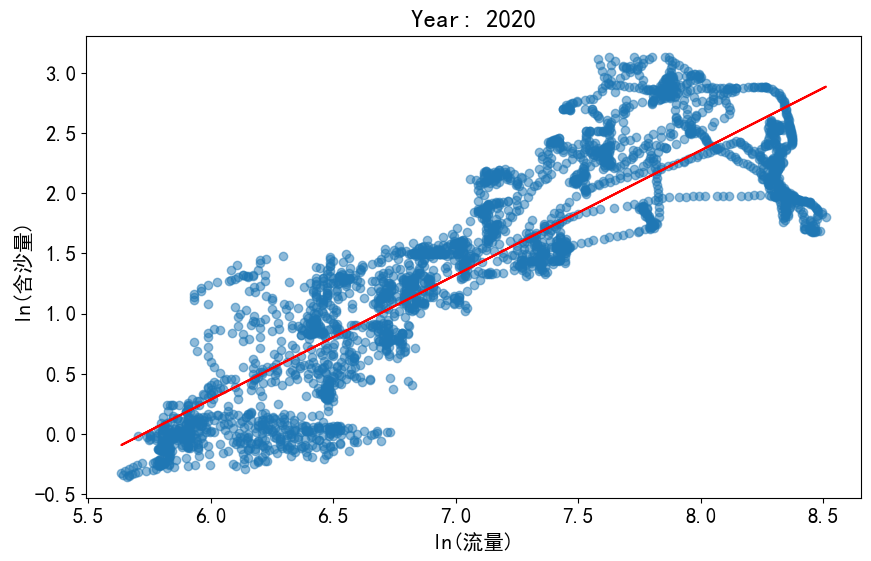

年份: 2021
截距: -4.611399188012989
系数: 0.794985599700013
R²: 0.7401893874364024
截距的p值: 0.0000
斜率的p值: 0.0000


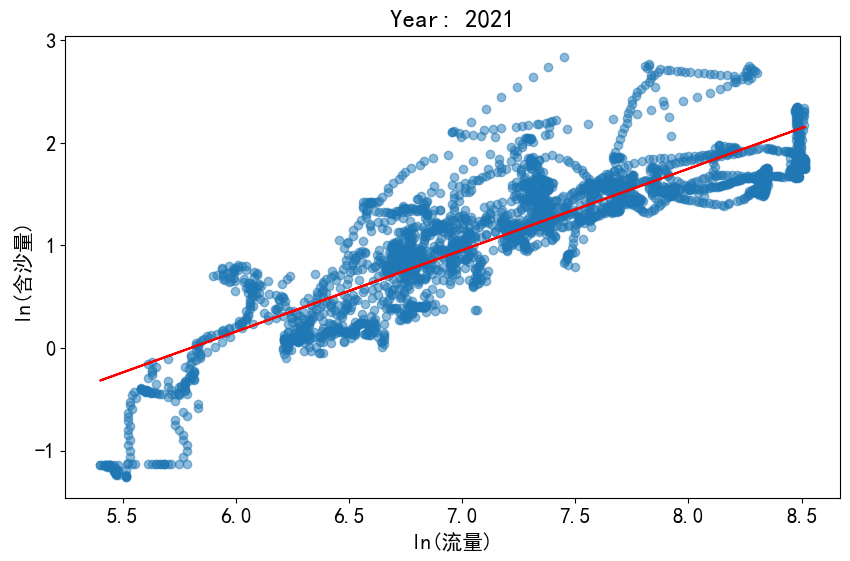

In [621]:
from doctest import DocFileCase
from sklearn.linear_model import LinearRegression  # 导入线性回归模型
from scipy import stats # 导入统计模块
import statsmodels.api as sm  # 导入统计模型
df = pd.read_csv('all_data.csv')
# 遍历列表中的每个年份
for year in [2016, 2017, 2018, 2019, 2020, 2021]:
    # 筛选当年数据
    year_data = df[df['年'] == year]
    # 如果数据不为空
    if not year_data.empty:
        # 取出流量和含沙量数据
        x = year_data['流量(m3/s)'].values
        y = year_data['含沙量(kg/m3) '].values 
        # 取对数
        ln_x = np.log(x).reshape(-1, 1)
        ln_y = np.log(y)
        # 拟合模型
        model = LinearRegression().fit(ln_x, ln_y)
        r_squared = model.score(ln_x, ln_y) # 计算R²
        X_with_const = np.hstack([np.ones((ln_x.shape[0], 1)), ln_x]) # 添加常数项
        model_sm = sm.OLS(ln_y, X_with_const).fit() 
        # 打印截距和系数
        print(f"年份: {year}")
        print(f"截距: {model_sm.params[0]}") 
        print(f"系数: {model_sm.params[1]}")
        print(f"R²: {r_squared}")
        print(f"截距的p值: {model_sm.pvalues[0]:.4f}")
        print(f"斜率的p值: {model_sm.pvalues[1]:.4f}")
 
        # 绘制散点图
        plt.figure(figsize=(10, 6))
        plt.scatter(ln_x, ln_y, alpha=0.5)
        plt.plot(ln_x, model.predict(ln_x), color='red')
        plt.xlabel('ln(流量)')
        plt.ylabel('ln(含沙量)')
        plt.title(f'Year: {year}')
        plt.savefig(f'F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\{year}含沙量与水流量.png')
        plt.show( )

        


#### 1.1.3 分析水位与含沙量的关系

- 建立双对数模型，分析水位与含沙量的关系。

### 第二小问：估算年总水流量和排沙量
- 将每年的水流量求和即为年总水流量
- 计算每年的排沙量
- 计算每年的排沙量 = Σ（水流量 * 含沙量）

In [622]:
i = 2016
all_data[all_data['年'] == i]['流量(m3/s)']

0       357
1       363
2       363
3       368
4       384
       ... 
2375    217
2376    217
2377    213
2378    215
2379    215
Name: 流量(m3/s), Length: 2355, dtype: int64

In [623]:
for i in [2016,2017,2018,2019,2020,2021]:
    print("第%d年:"%i)
    print("年总水流量(m3)为：%f"%(all_data[all_data['年'] == i]['流量(m3/s)'].sum()))
    flow =all_data[all_data['年'] == i ]['流量(m3/s)'].astype(float)
    sand =all_data[all_data['年'] == i]['含沙量(kg/m3) '].astype(float)
    print("年总排沙量(kg)为：%f"%((flow*sand).sum()))
print("总排沙量为：%f"%((all_data['流量(m3/s)'].astype(float)*all_data['含沙量(kg/m3) '].astype(float)).sum()))


第2016年:
年总水流量(m3)为：1065927.000000
年总排沙量(kg)为：1332976.121713
第2017年:
年总水流量(m3)为：1056639.000000
年总排沙量(kg)为：1263200.454256
第2018年:
年总水流量(m3)为：4170190.000000
年总排沙量(kg)为：32136415.518640
第2019年:
年总水流量(m3)为：4564905.000000
年总排沙量(kg)为：43227383.062813
第2020年:
年总水流量(m3)为：4850338.000000
年总排沙量(kg)为：42433056.827695
第2021年:
年总水流量(m3)为：5315331.000000
年总排沙量(kg)为：27648602.848760
总排沙量为：148041634.833876


# 问题二
## 分析近 6 年该水文站水沙通量的突变性、季节性和周期性等特性，研究水沙通量的变化规律。
### 2.1.1 通过Mann-Kendall检验进行水沙通量的突变性分析。
- 通过Mann-Kendall检验，对水沙通量进行突变性分析


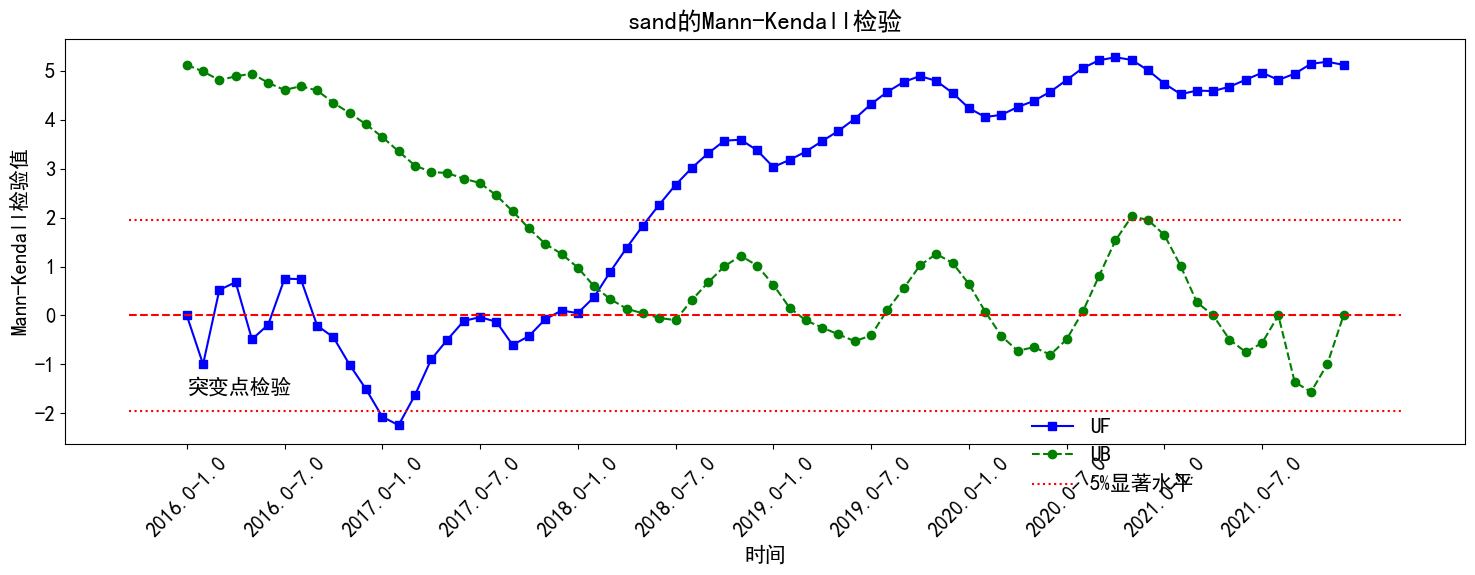

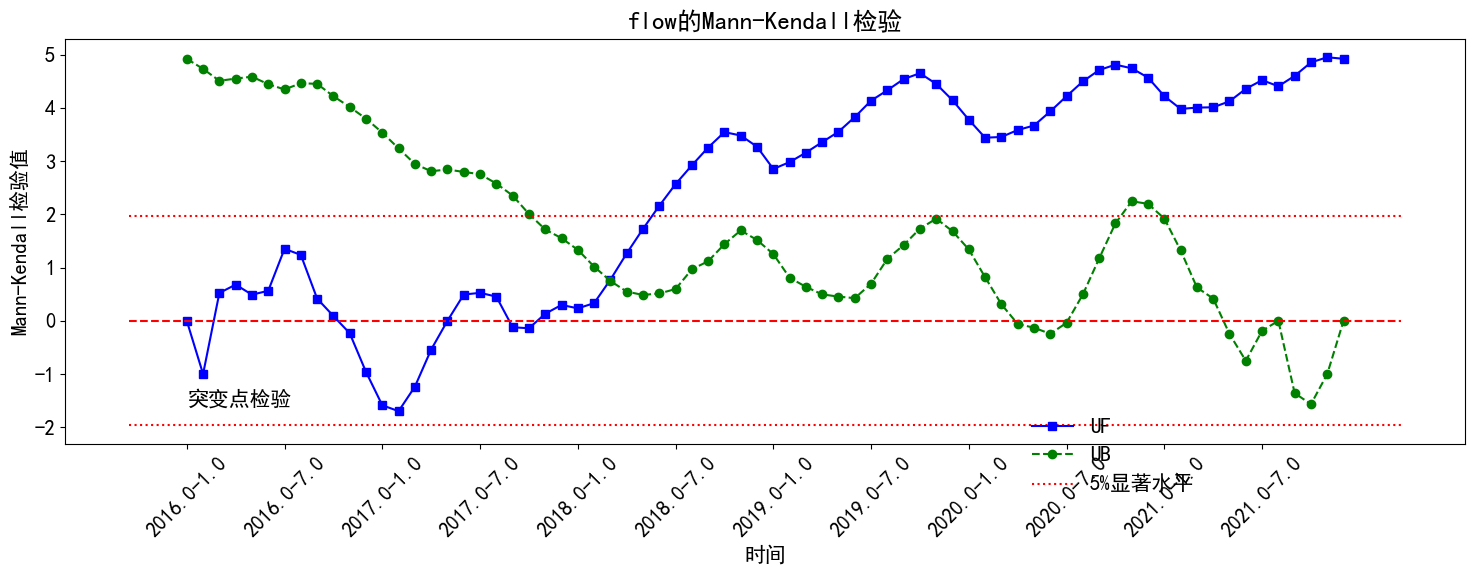

(array([ 0.        , -1.        ,  0.52223297,  0.67936622,  0.48989795,
         0.56360186,  1.35169067,  1.23717915,  0.41702883,  0.08944272,
        -0.23354968, -0.96001567, -1.58623108, -1.69709159, -1.23717915,
        -0.5402702 ,  0.        ,  0.49241011,  0.52478357,  0.45421998,
        -0.12078769, -0.14098965,  0.13205228,  0.29765284,  0.23354968,
         0.33062326,  0.77133567,  1.26441725,  1.72574169,  2.15876475,
         2.56645896,  2.91896156,  3.25382666,  3.54304195,  3.47935085,
         3.26901459,  2.8511961 ,  2.97954143,  3.15728373,  3.35549795,
         3.54929245,  3.82559843,  4.1338411 ,  4.32890426,  4.53899637,
         4.64886254,  4.44766992,  4.14182681,  3.77548798,  3.43795654,
         3.45193972,  3.58254865,  3.66659594,  3.93163173,  4.21779279,
         4.49495221,  4.70855266,  4.80962591,  4.74112822,  4.56659648,
         4.21913618,  3.97852357,  4.00348548,  4.00918655,  4.1214884 ,
         4.35533991,  4.51862144,  4.40411007,  4.5

In [624]:
# 通过Mann-Kendall突变性检验，分别对排沙量和流量进行突变性分析
from turtle import color
from pandas.core import frame
from pymannkendall import original_test, hamed_rao_modification_test, yue_wang_modification_test
from scipy.stats import f
# 计算月均排沙量
# 读取数据
data = pd.read_csv('all_data.csv')

# 将日期转换为datetime格式
data['日期'] = pd.to_datetime(data[['年', '月', '日']].rename(columns={'年': 'year', '月': 'month', '日': 'day'}))

# 设置日期为索引
data.set_index('日期', inplace=True)

# 修正列名，去除可能的空格
data.rename(columns=lambda x: x.strip(), inplace=True)

# 确保需要计算平均值的列是数值类型
numeric_columns = ['流量(m3/s)', '含沙量(kg/m3)', '水位(m)']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# 计算每年每月的平均流量和含沙量
monthly_data = data.groupby(['年', '月'])[numeric_columns].mean()
# 计算月均排沙量
monthly_data['月均排沙量'] = monthly_data['流量(m3/s)'] * monthly_data['含沙量(kg/m3)']
# 保存月均排沙量数据到CSV文件
monthly_data.to_csv("monthly_data.csv")
df = pd.read_csv('monthly_data.csv') # 读取每月平均排沙量and流量的数据
# 将数据按照时间顺序进行排列
df = df.sort_values(by=['年','月'])
# 计算后的数据添加到原数据中
df.to_csv("monthly_data.csv", index=False)
# 读取数据
df = pd.read_csv('f:/vscode_code/E2023/2023_CUMCM_E-main/monthly_data.csv')


# 按照年月顺序排序
df = df.sort_values(by=['年', '月'])

# 创建时间标签
df['时间标签'] = df['年'].astype(str) + '-' + df['月'].astype(str).str.zfill(2)

# 设置x为按月份分布的时间序列
x = df['时间标签'].values

#   计算每年的含沙量均值
def MK(x, y, st):
    # st:检验的变量名称
    n = len(y)
    # 正序计算
    # 定义累计量序列Sk，长度n，初始值为0
    Sk = np.zeros(n)
    UFk = np.zeros(n)

    # 定义Sk序列元素s
    s = 0

    for i in range(1, n):
        for j in range(0,i):
            if y[i] > y[j]:
                s += 1
        Sk[i] = s
        E = (i+1)*(i/4)
        Var = (i+1)*i*(2*(i+1)+5)/72
        UFk[i] = (Sk[i] - E)/np.sqrt(Var)

    # 逆序计算
    y2 = y[::-1]
    Sk2 = np.zeros(n)
    UBk = np.zeros(n)

    s = 0
    for i in range(1, n):
        for j in range(0,i):
            if y2[i] > y2[j]:
                s += 1
        Sk2[i] = s
        E = (i+1)*(i/4)
        Var = (i+1)*i*(2*(i+1)+5)/72
        UBk[i] = -(Sk2[i] - E)/np.sqrt(Var)

    UBk2 = UBk[::-1]

    # 画图
    plt.figure(figsize=(15, 6))
    plt.plot(range(n), UFk, label='UF', color='b', marker='s')
    plt.plot(range(n), UBk2, label='UB', color='g', linestyle='--', marker='o')
    plt.ylabel('Mann-Kendall检验值')
    plt.xlabel('时间')
    
    # 添加图名
    plt.title(f"{st}的Mann-Kendall检验")
    
    # 添加辅助线
    x_lim = plt.xlim()
    plt.plot(x_lim, [-1.96,-1.96], ':', color='r', label='5%显著水平')
    plt.plot(x_lim, [0,0], '--', color='r')
    plt.plot(x_lim, [1.96,1.96], ':', color='r')

    # 设置x轴刻度和标签
    # 每6个月显示一个标签
    tick_positions = np.arange(0, n, 6)
    tick_labels = [x[i] for i in tick_positions if i < n]
    plt.xticks(tick_positions, tick_labels, rotation=45)
    
    # 设置图例位置
    plt.legend(bbox_to_anchor=(0.82, 0.11), facecolor='w', frameon=False)
    
    # 添加文本注释
    plt.text(0, -1.6, '突变点检验')
    plt.tight_layout()  # 自动调整布局
    plt.savefig(f'F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\MK检验{st}.png', dpi=350)
    plt.show()
    
    # 返回检验结果
    return UFk, UBk2

# 调用函数
MK(x, df['月均排沙量'].values, "sand")
MK(x, df['流量(m3/s)'].values, "flow")

### 2.1.2 通过季节性分解进行水沙通量的季节性分析。
- 通过季节性分解，对水沙通量进行季节性分析

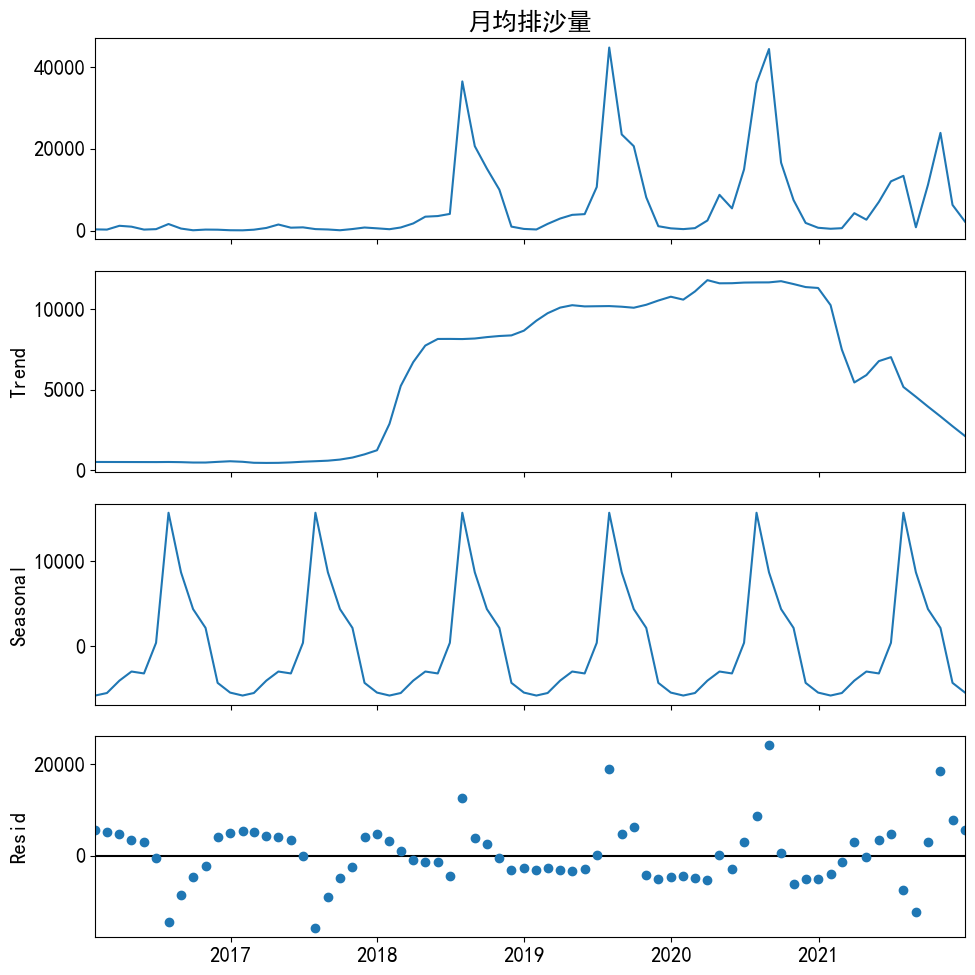

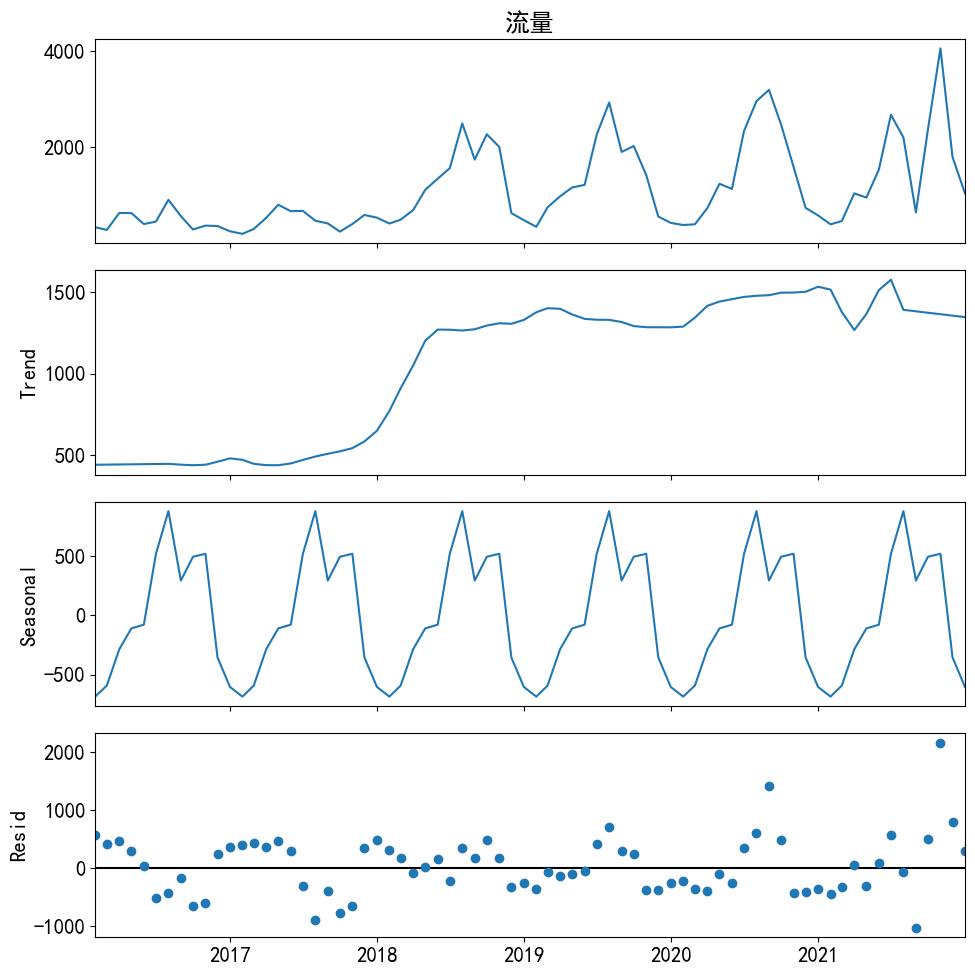

In [625]:
# 导入季节性分解函数
from statsmodels.tsa.seasonal import seasonal_decompose 

# 导入数据
df1 = pd.read_csv("monthly_data.csv")

df2 = pd.DataFrame()
df3 = pd.DataFrame()
# 将数据中的排沙量数据导入到数据框中
df2['月均排沙量'] = df1['月均排沙量']
df2.index = pd.date_range('2016-01-01', periods=12*6, freq='M')

df3['流量'] = df1['流量(m3/s)']
df3.index = pd.date_range('2016-01-01', periods=12*6, freq='M')
# 季节分解函数
def seasonal_mul(data, st):     
    # st：变量名称，字符串类型
    result_mul = seasonal_decompose(data, model='multiplicative', extrapolate_trend='freq') # 季节性分解
    plt.rcParams.update({'figure.figsize': (10, 10)})   # 设置图形大小
    result_mul.plot()   # 绘制分解结果图
    plt.savefig('F:\\vscode_code\E2023\\2023_CUMCM_E-main\\结果保存/'+st+'_multiplicative.png')
    plt.show()

result_mul = seasonal_decompose(df2['月均排沙量'], model='multiplicative', extrapolate_trend='freq',period=12) 

# 获取趋势、季节、残差值
trend = result_mul.trend # 
seasonal = result_mul.seasonal
residual = result_mul.resid
def seasonal_add(data, st):
    result_add = seasonal_decompose(data, model='additive', extrapolate_trend='freq')
    # 季节性分解
    plt.rcParams.update({'figure.figsize': (10, 10)})
    # 设置图形大小
    result_add.plot()
    plt.savefig('F:\\vscode_code\E2023\\2023_CUMCM_E-main\\结果保存/'+st+'_additive.png')
    plt.show()
seasonal_add(df2['月均排沙量'], 'sand')
seasonal_add(df3['流量'], 'flow')

### 2.1.3 通过傅里叶变换进行水沙通量的周期性分析。
- 通过傅里叶变换进行周期性分析

排沙量 的主要周期分析结果:
top_k_power: [282687.34950498 180372.35419164 141900.81296868]
fft_periods: [12 14 10]


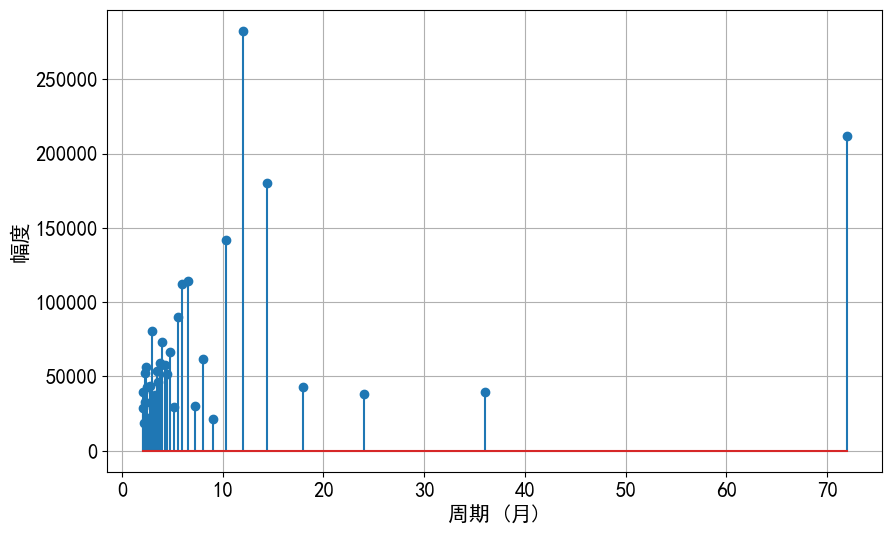

水流量 的主要周期分析结果:
top_k_power: [24867.58408348 16237.70397409 11627.51606225]
fft_periods: [12 14 36]


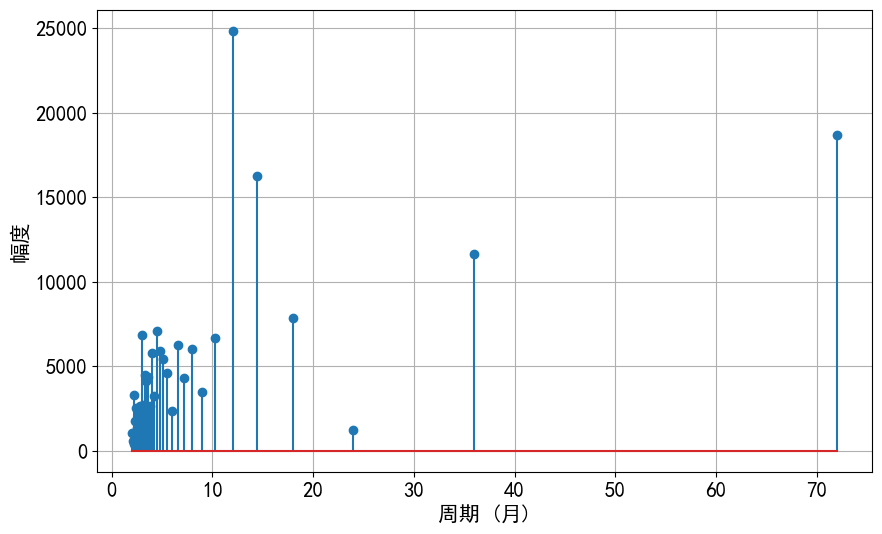

array([12, 14, 36])

In [626]:

from scipy.fftpack import fft, fftfreq
datas = pd.read_csv('F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\monthly_data.csv')

# 从导入的数据中识别出幅度最大的前K个周期性成分，并返回这些周期性成分的频率和周期。
def ffts(data,title=""):
    # fft函数用于计算快速傅里叶变换（FFT），fftfreq函数用于返回FFT样本频率
    fft_series = fft(data.values) # FFT将时间序列从时间域转换到频率域
    power = np.abs(fft_series) # FFT的结果是一个复数数组，表示每个频率成分的幅度和相位。这里我们只关心幅度，所以使用np.abs来计算。
    sample_freq = fftfreq(fft_series.size) # fftfreq函数返回FFT的样本频率。这些频率对应于fft_series中的每个元素。

    pos_mask = np.where(sample_freq > 0) #由于FFT的结果是对称的（对于实数输入），我们只需要考虑一半的频率成分（通常是正频率成分）。
    freqs = sample_freq[pos_mask] 
    # 取出正频率成分
    powers = power[pos_mask]    # 取出正频率成分的幅度
     # 过滤掉不合理的周期（大于数据长度一半的周期）
    valid_mask = freqs >= 1/(data.size/2)
    valid_freqs = freqs[valid_mask]
    valid_powers = powers[valid_mask]
    # 找出幅度最大的前K个频率成分:
    # 这里，np.argpartition函数用于对powers数组进行部分排序，并返回前K个最大值的索引。
    # 然后，我们使用这些索引从powers和freqs数组中提取相应的值。
    top_k_seasons = 3   
    # top K=3 index
    # 由于我们关心的是周期性成分，因此我们需要计算与这些频率对应的周期。
    # 对于频率f，其周期T是1/f。这里，我们将这些周期转换为整数（四舍五入到最接近的整数周期）。
   # 找出幅度最大的前K个频率成分
    if len(valid_powers) < top_k_seasons:
        top_k_seasons = len(valid_powers)
    top_k_idxs = np.argsort(valid_powers)[-top_k_seasons:][::-1]   # 取出前K个最大值的索引
    top_k_power = valid_powers[top_k_idxs]    # 取出前K个最大值
    top_k_freqs = valid_freqs[top_k_idxs]
    fft_periods = (1/top_k_freqs).astype(int)   # 取出前K个最大值对应的周期

    print(f"{title} 的主要周期分析结果:")
    print(f"top_k_power: {top_k_power}")    # 打印前K个最大值
    print(f"fft_periods: {fft_periods}")    # 打印前K个最大值对应的周期
   # 可视化频谱
    plt.figure(figsize=(10, 6))
    plt.stem(1/freqs, powers)
    plt.xlabel('周期 (月)')
    plt.ylabel('幅度')

    plt.grid(True)
    plt.savefig(f'F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\频谱分析_{title}.png', dpi=300)
    plt.show()
    
    return fft_periods
ffts(datas['月均排沙量'],"排沙量")
ffts(datas["流量(m3/s)"],"水流量")


# 问题三
## 根据该水文站水沙通量的变化规律，预测分析该水文站未来两年水沙通量的变化趋势，并为该水文站制订未来两年最优的采样监测方案（采样监测次数和具体时间等），使其既能及时掌握水沙通量的动态变化情况，又能最大程度地减少监测成本资源。
### 3.1.1 根据水沙通量的变化规律，预测和分析该水文站未来两年水沙通量的变化趋势
- 通过时间序列，构建SARIMA模型进行预测和分析
    1. 对数据进行平稳性检验，检验数据是否平稳
        1. 原假设：数据不平稳，当p值＞=0.05时，不能拒绝原假设。
    2. 进行随机性检验（白噪声检验），检验数据是否为纯随机数据
        1. 通过Ljung-Box Q检验方法进行白噪声检验
        2. 原假设：序列为白噪声（自相关系数为0）
            - 当P值<0.05时，拒绝原假设，序列并非纯随机数据，不是白噪声。
    3. 进行季节性差分
        - 发现仍具有不平稳性
    4. 进行一阶差分
        - 数据通过ADF检验，但为了效果更优，进行二阶差分
    5. 进行二阶差分
        - 数据平稳，通过ADF检验和白噪声检验
    6. 分别绘制季节性和非季节性的ACF和PACF图
        - 分析ACF和PACF图：
            1. AR(p)模型的特征
                - ACF : 呈现拖尾特性，缓慢衰减
                - PACF : 在滞后p阶后截尾（即p阶后的值接近于0或在置信区间内）
            2. MA(q)模型的特征
                - ACF : 在滞后q阶后截尾（即q阶后的值接近于0或在置信区间内）
                - PACF : 呈现拖尾特性，缓慢衰减
            3. ARMA(p,q)模型的特征
                - ACF : 在滞后q阶后呈现AR(p)型的拖尾特性
                - PACF : 在滞后p阶后呈现MA(q)型的拖尾特性
                - 两者都呈现拖尾特性
        - 根据图片进行初步判断p,q,P,Q的阶数
            1. 非季节性ACF基本在滞后1阶后截尾，PACF在2-3阶后截尾，因此初步判断q=1，p=2
        - 为确定更准确的阶数，我们采用AIC（赤池信息准则）和BIC（贝叶斯信息准则）共同确定阶数（通过代码计算实现）
        - 绘制相关热力图（目的是为了直观输出最佳阶数值）
    7. 模型诊断
        - 取得最佳阶数后，进行模型诊断，输出SARIMA(0,2,3)(1,1,2,6)的结果摘要
            （摘要解释放在模型诊断后）
    8. 模型检验
        - 通过dw检验方法进行模型检验：
        1. 0 < DW < 1.5 ：存在正自相关
            - 0 < DW < 1.0 ：强正自相关
            - 1.0 ≤ DW < 1.5 ：弱正自相关
        2. 1.5 ≤ DW ≤ 2.5 ：不存在自相关（残差独立）拟合良好
            - DW = 2 ：完全不存在自相关（理想值）
        3. 2.5 < DW < 4 ：存在负自相关
            - 2.5 < DW ≤ 3.0 ：弱负自相关
            - 3.0 < DW < 4.0 ：强负自相关
        - 如果不存在自相关性就说明模型拟合效果良好

- 根据前两问，发现原时间序列数据存在突变性、周期性、季节性等属性，且排沙量和流量数据变化规律基本一致，因此综合考虑水沙通量为流量。构建模型进行预测分析。



In [627]:
# # 导入环境中的相关包
import itertools
import numpy as np #
import pandas as pd #
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from statsmodels.tsa.stattools import adfuller
import math
import seaborn as sns
import statsmodels.api as sm
#import tensorflow as tf

#忽略警告
warnings.filterwarnings('ignore')

In [628]:
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF统计量: %f' % result[0])
    print('p值: %f' % result[1])
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [629]:
#白噪声检验也称为纯随机性检验，当数据是纯随机数据时，再对数据进行分析就没有任何意义了，所以拿到数据后最好对数据进行一个纯随机性检验。
def acorr_val(ts, lags=1):
    '''
    # 白噪声（随机性）检验
    ts: 时间序列数据，Series类型
    返回白噪声检验的P值
    '''
    # 其中lags为检验的延迟数，需要指定一个值，值的确认一般是20，或是序列长度，
    # 一般需要ljungbox_result中最小的p值大于等于0.05，才能确定这个序列是纯随机的（相当于每个p都大于等于0.05）
    # 否则就不是纯随机的了

    aco_df = acorr_ljungbox(ts, lags, return_df=True)  # 白噪声检验结果
    return aco_df

In [630]:
# 绘制偏自相关图
def tsplot(y, name, lags=None, figsize=(14, 8)):
    # name在字符串：变量名称
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    y.plot(ax=ts_ax)
    ts_ax.set_title('原时间序列')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('直方图')
    #自相关（Autocorrelation）： 对一个时间序列，现在值与其过去值的相关性。如果相关性为正，则说明现有趋势将继续保持。
    plot_acf(y, lags=lags, ax=acf_ax)
    acf_ax.set_title('自相关图')
    #fig.acf_ax.set_xlim(-1, 12)
    #可以度量现在值与过去值更纯正的相关性
    plot_pacf(y, lags=lags, ax=pacf_ax)
    pacf_ax.set_title('偏相关图')
    #fig.pacf_ax.set_xlim(-1, 12)
    #[ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
 
    fig.tight_layout()
    fig.show()
    fig.figure.savefig('F:\my _file\全国大学生数学建模大赛\CUMCM2023\E题'+name+'.png')
    return ts_ax, acf_ax, pacf_ax

In [631]:
data_test = pd.read_csv('F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\monthly_data.csv')
# 水流量分析
flow_data = data_test["流量(m3/s)"]
#平稳性检验
adf_test(flow_data)
# 白噪声检验
acorr_val(flow_data)



ADF统计量: -0.872679
p值: 0.796836
	1%: -3.542
	5%: -2.910
	10%: -2.593


,lb_stat,lb_pvalue
1,38.785711,4.729774e-10


### 初步进行检验，发现ADF检验和白噪声检验均不通过，因此对数据进行差分处理


对水流量进行季节性差分
水流量的季节性差分（周期=6）结果:
差分前数据长度: 72
差分后数据长度: 66


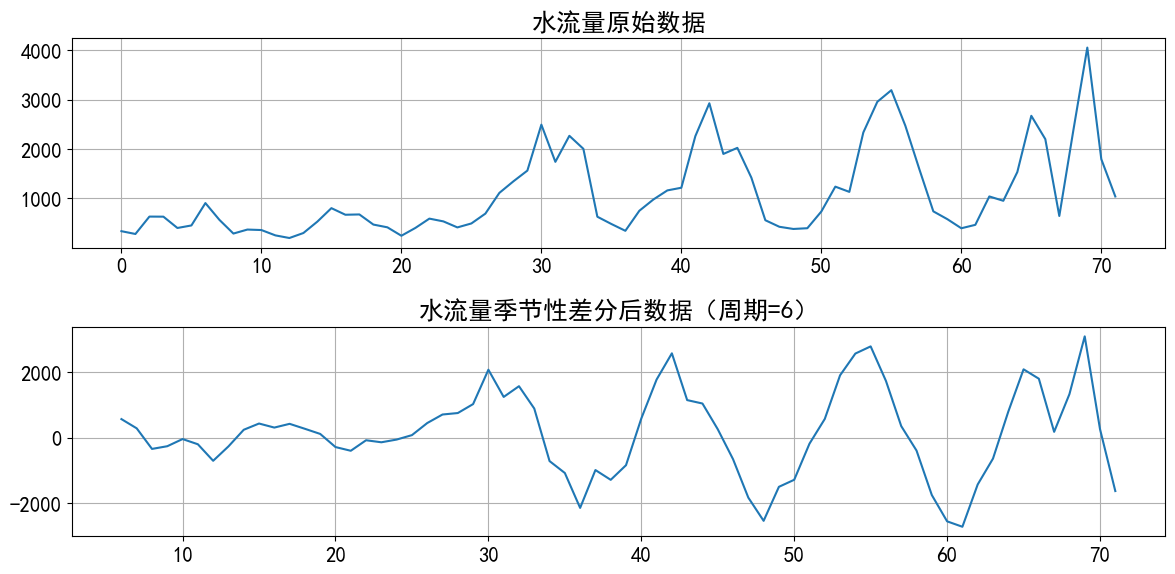

In [632]:
# 定义季节性差分函数
def seasonal_diff(timeseries, period=12, title=''):
    """
    对时间序列进行季节性差分
    
    参数:
    timeseries: 时间序列数据
    period: 季节周期，默认为3
    title: 数据标题，用于输出结果
    
    返回:
    差分后的时间序列
    """
    diff = timeseries.diff(period).dropna()
    
    print(f"{title}的季节性差分（周期={period}）结果:")
    print(f"差分前数据长度: {len(timeseries)}")
    print(f"差分后数据长度: {len(diff)}")
    
    # 绘制差分前后的时间序列图
    plt.figure(figsize=(12, 6))
    plt.subplot(211)
    plt.plot(timeseries)
    plt.title(f"{title}原始数据")
    plt.grid(True)
    
    plt.subplot(212)
    plt.plot(diff)
    plt.title(f"{title}季节性差分后数据（周期={period}）")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\季节性差分.png', dpi=350)
    plt.show()
    
    return diff
# 水流量分析
flow_data = data_test["流量(m3/s)"]
# 对水流量进行季节性差分（周期为12个月）
print("\n对水流量进行季节性差分")
flow_diff = seasonal_diff(flow_data, period=6, title="水流量")

一阶差分的阶差分结果:
差分前数据长度: 66
差分后数据长度: 65


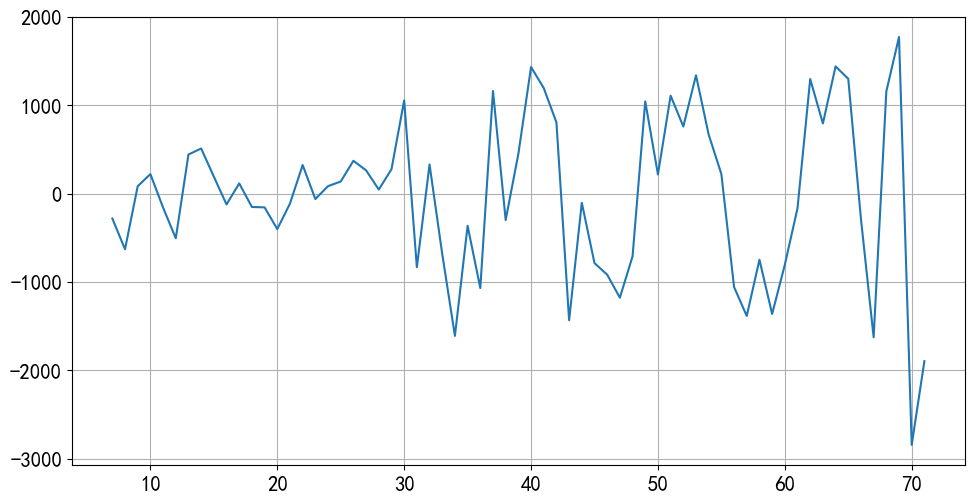

一阶差分差分后的ADF检验结果:
ADF统计量: -4.387297
p值: 0.000313
临界值:
	1%: -3.560
	5%: -2.918
	10%: -2.597

结论: 在显著性水平0.05下，拒绝原假设，一阶差分差分后序列是平稳的。
二阶差分的阶差分结果:
差分前数据长度: 66
差分后数据长度: 64


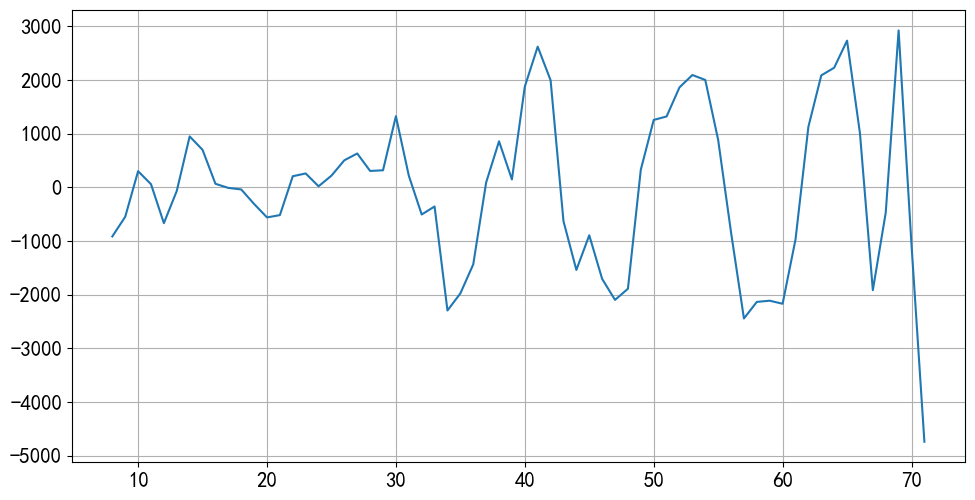

二阶差分差分后的ADF检验结果:
ADF统计量: -4.281877
p值: 0.000477
临界值:
	1%: -3.563
	5%: -2.919
	10%: -2.597

结论: 在显著性水平0.05下，拒绝原假设，二阶差分差分后序列是平稳的。


In [633]:
# 定义差分函数
def diff_function(timeseries, diff_order=1, title=''):
    """
    对时间序列进行差分处理
    
    参数:
    timeseries: 时间序列数据
    diff_order: 差分阶数，默认为1（一阶差分）
    title: 数据标题，用于输出结果
    
    返回:
    差分后的时间序列
    """
    # 进行差分处理
    diff_data = timeseries.diff(diff_order).dropna()
    
    print(f"{title}的阶差分结果:")
    print(f"差分前数据长度: {len(timeseries)}")
    print(f"差分后数据长度: {len(diff_data)}")
    
    # 绘制差分后的时间序列图
    
    plt.subplot(212)
    plt.plot(diff_data)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\{title}差分图.png', dpi=350)
    plt.show()
    
    # 检验差分后的平稳性
    result = adfuller(diff_data.dropna())
    print(f"{title}差分后的ADF检验结果:")
    print('ADF统计量: %f' % result[0])
    print('p值: %f' % result[1])
    print('临界值:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    # 判断结果
    if result[1] <= 0.05:
        print(f"\n结论: 在显著性水平0.05下，拒绝原假设，{title}差分后序列是平稳的。")
    else:
        print(f"\n结论: 在显著性水平0.05下，不能拒绝原假设，{title}差分后序列是非平稳的。")
    
    return diff_data


flow_diff_1 = diff_function(flow_diff, diff_order=1, title="一阶差分")
flow_diff_2 = diff_function(flow_diff, diff_order=2, title="二阶差分")

In [634]:
print("分别对两次差分后数据进行白噪声检验")
print("一阶差分白噪声检验结果")
white_data1 = acorr_val(flow_diff_1)
print(white_data1)
print("二阶差分白噪声检验结果")
white_data2 = acorr_val(flow_diff_2)
print(white_data2)

分别对两次差分后数据进行白噪声检验
一阶差分白噪声检验结果
   lb_stat  lb_pvalue
1  5.88813   0.015243
二阶差分白噪声检验结果
     lb_stat  lb_pvalue
1  20.577033   0.000006


(<Axes: title={'center': '原时间序列'}>, <Axes: title={'center': '自相关图'}>, <Axes: title={'center': '偏相关图'}>)
(<Axes: title={'center': '原时间序列'}>, <Axes: title={'center': '自相关图'}>, <Axes: title={'center': '偏相关图'}>)


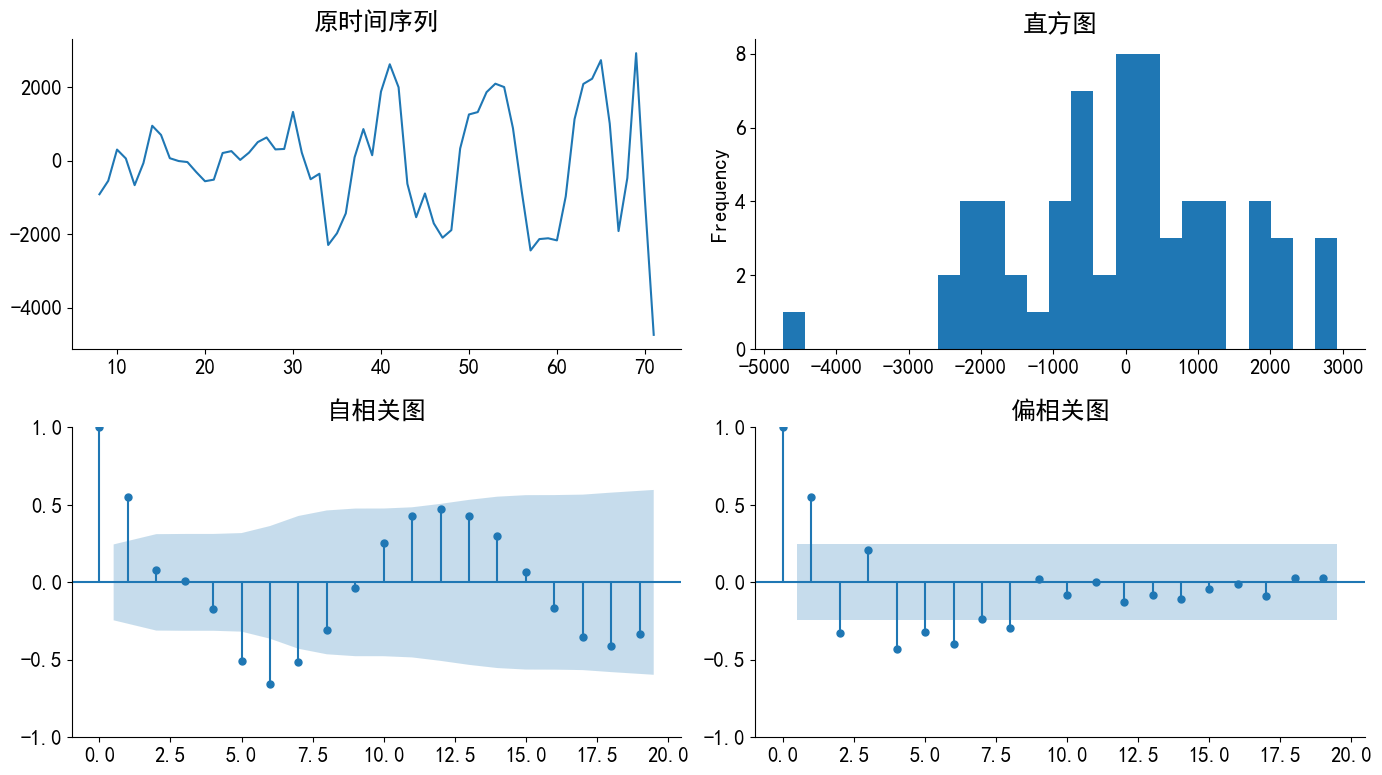

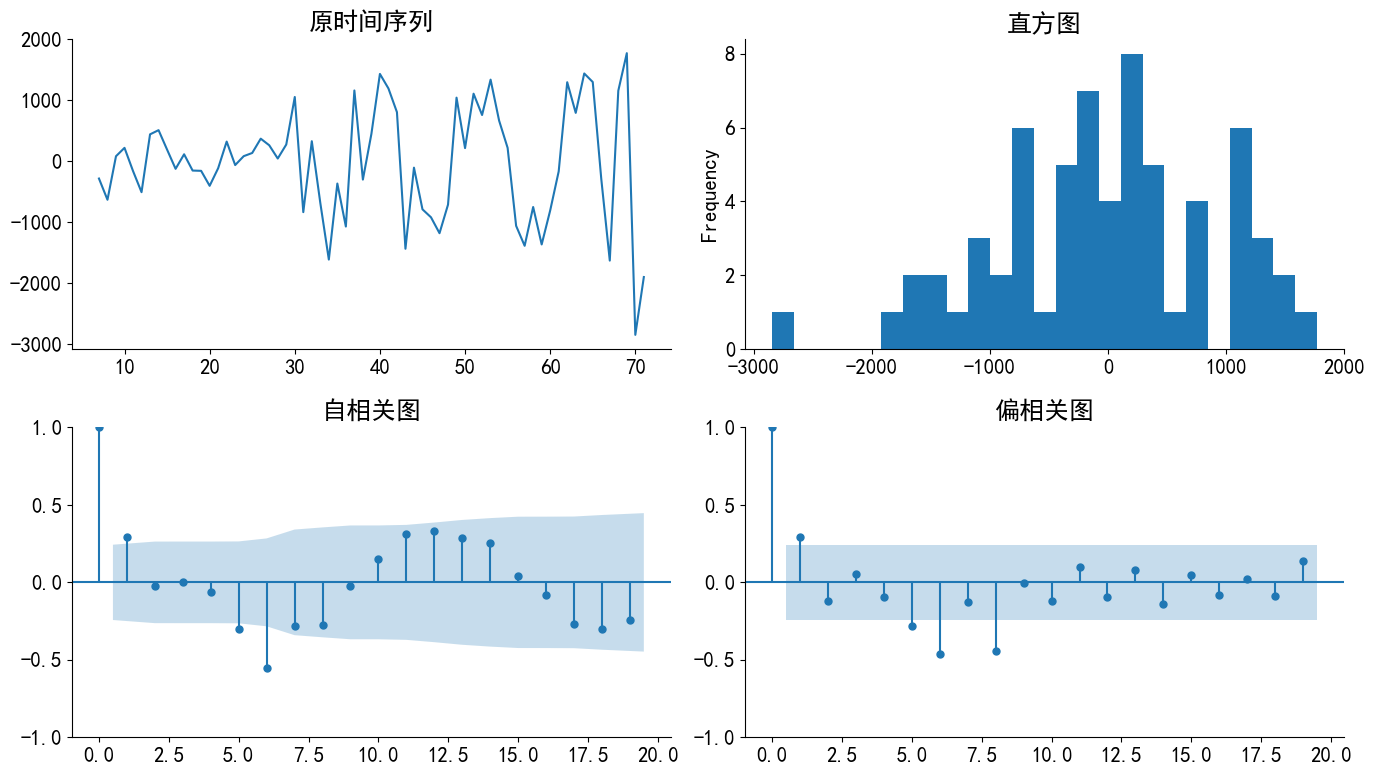

In [635]:
print(tsplot(flow_diff_2,"二阶差分"))
print(tsplot(flow_diff_1,"一阶差分"))

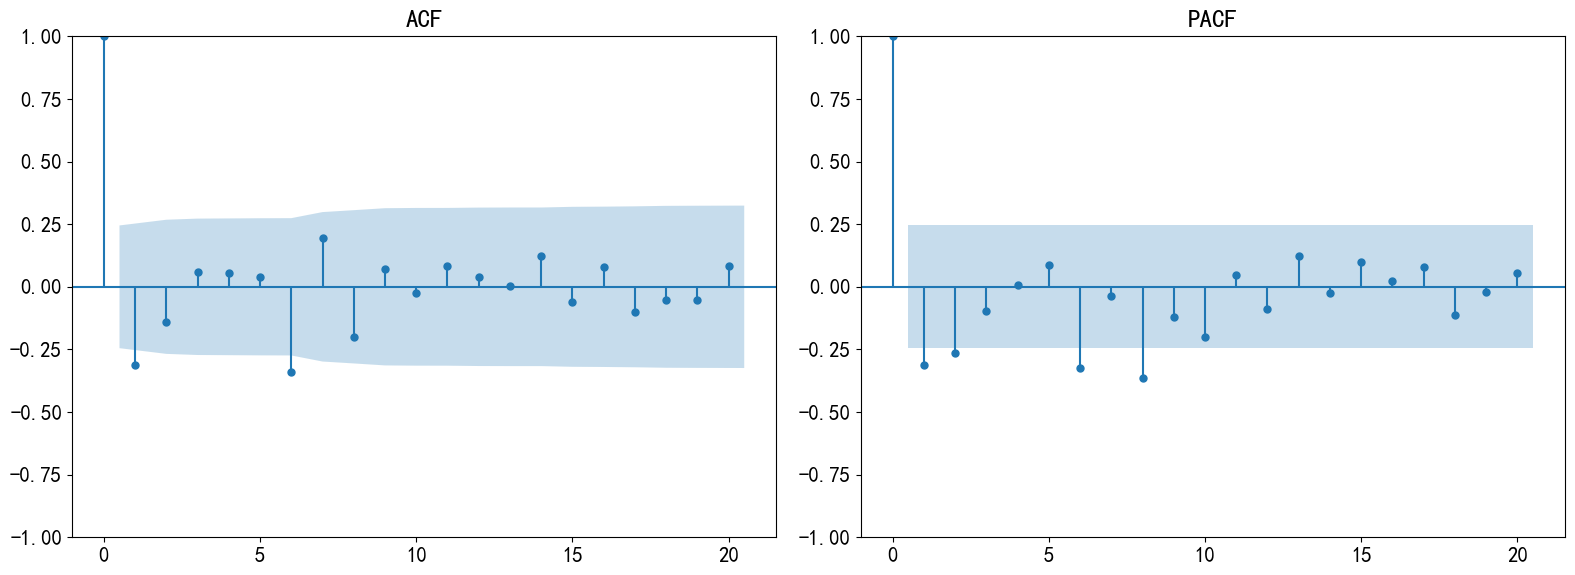

根据ACF和PACF图的初步判断：
非季节性部分：p = 2, q = 1

使用AIC和BIC准则进行网格搜索以确定最佳参数...
SARIMA(0,2,0)x(0,1,1,6) - AIC:944.7903, BIC:948.8764
SARIMA(0,2,0)x(0,1,2,6) - AIC:846.5645, BIC:852.3600
SARIMA(0,2,0)x(1,1,0,6) - AIC:968.9292, BIC:973.0501
SARIMA(0,2,0)x(1,1,1,6) - AIC:943.3935, BIC:949.5227
SARIMA(0,2,0)x(1,1,2,6) - AIC:849.6172, BIC:857.3445
SARIMA(0,2,0)x(2,1,0,6) - AIC:868.2587, BIC:874.1124
SARIMA(0,2,0)x(2,1,1,6) - AIC:864.5719, BIC:872.3769
SARIMA(0,2,0)x(2,1,2,6) - AIC:849.4758, BIC:859.1349
SARIMA(0,2,1)x(0,1,0,6) - AIC:1036.9576, BIC:1041.2119
SARIMA(0,2,1)x(0,1,1,6) - AIC:906.3691, BIC:912.4452
SARIMA(0,2,1)x(0,1,2,6) - AIC:810.0114, BIC:817.6595
SARIMA(0,2,1)x(1,1,0,6) - AIC:935.5321, BIC:941.7134
SARIMA(0,2,1)x(1,1,1,6) - AIC:897.4812, BIC:905.5826
SARIMA(0,2,1)x(1,1,2,6) - AIC:807.8512, BIC:817.4114
SARIMA(0,2,1)x(2,1,0,6) - AIC:841.7689, BIC:849.5739
SARIMA(0,2,1)x(2,1,1,6) - AIC:837.8144, BIC:847.5706
SARIMA(0,2,1)x(2,1,2,6) - AIC:808.9601, BIC:820.4322
SARIMA(0,2,2)x(0,1,0,6) - AIC:

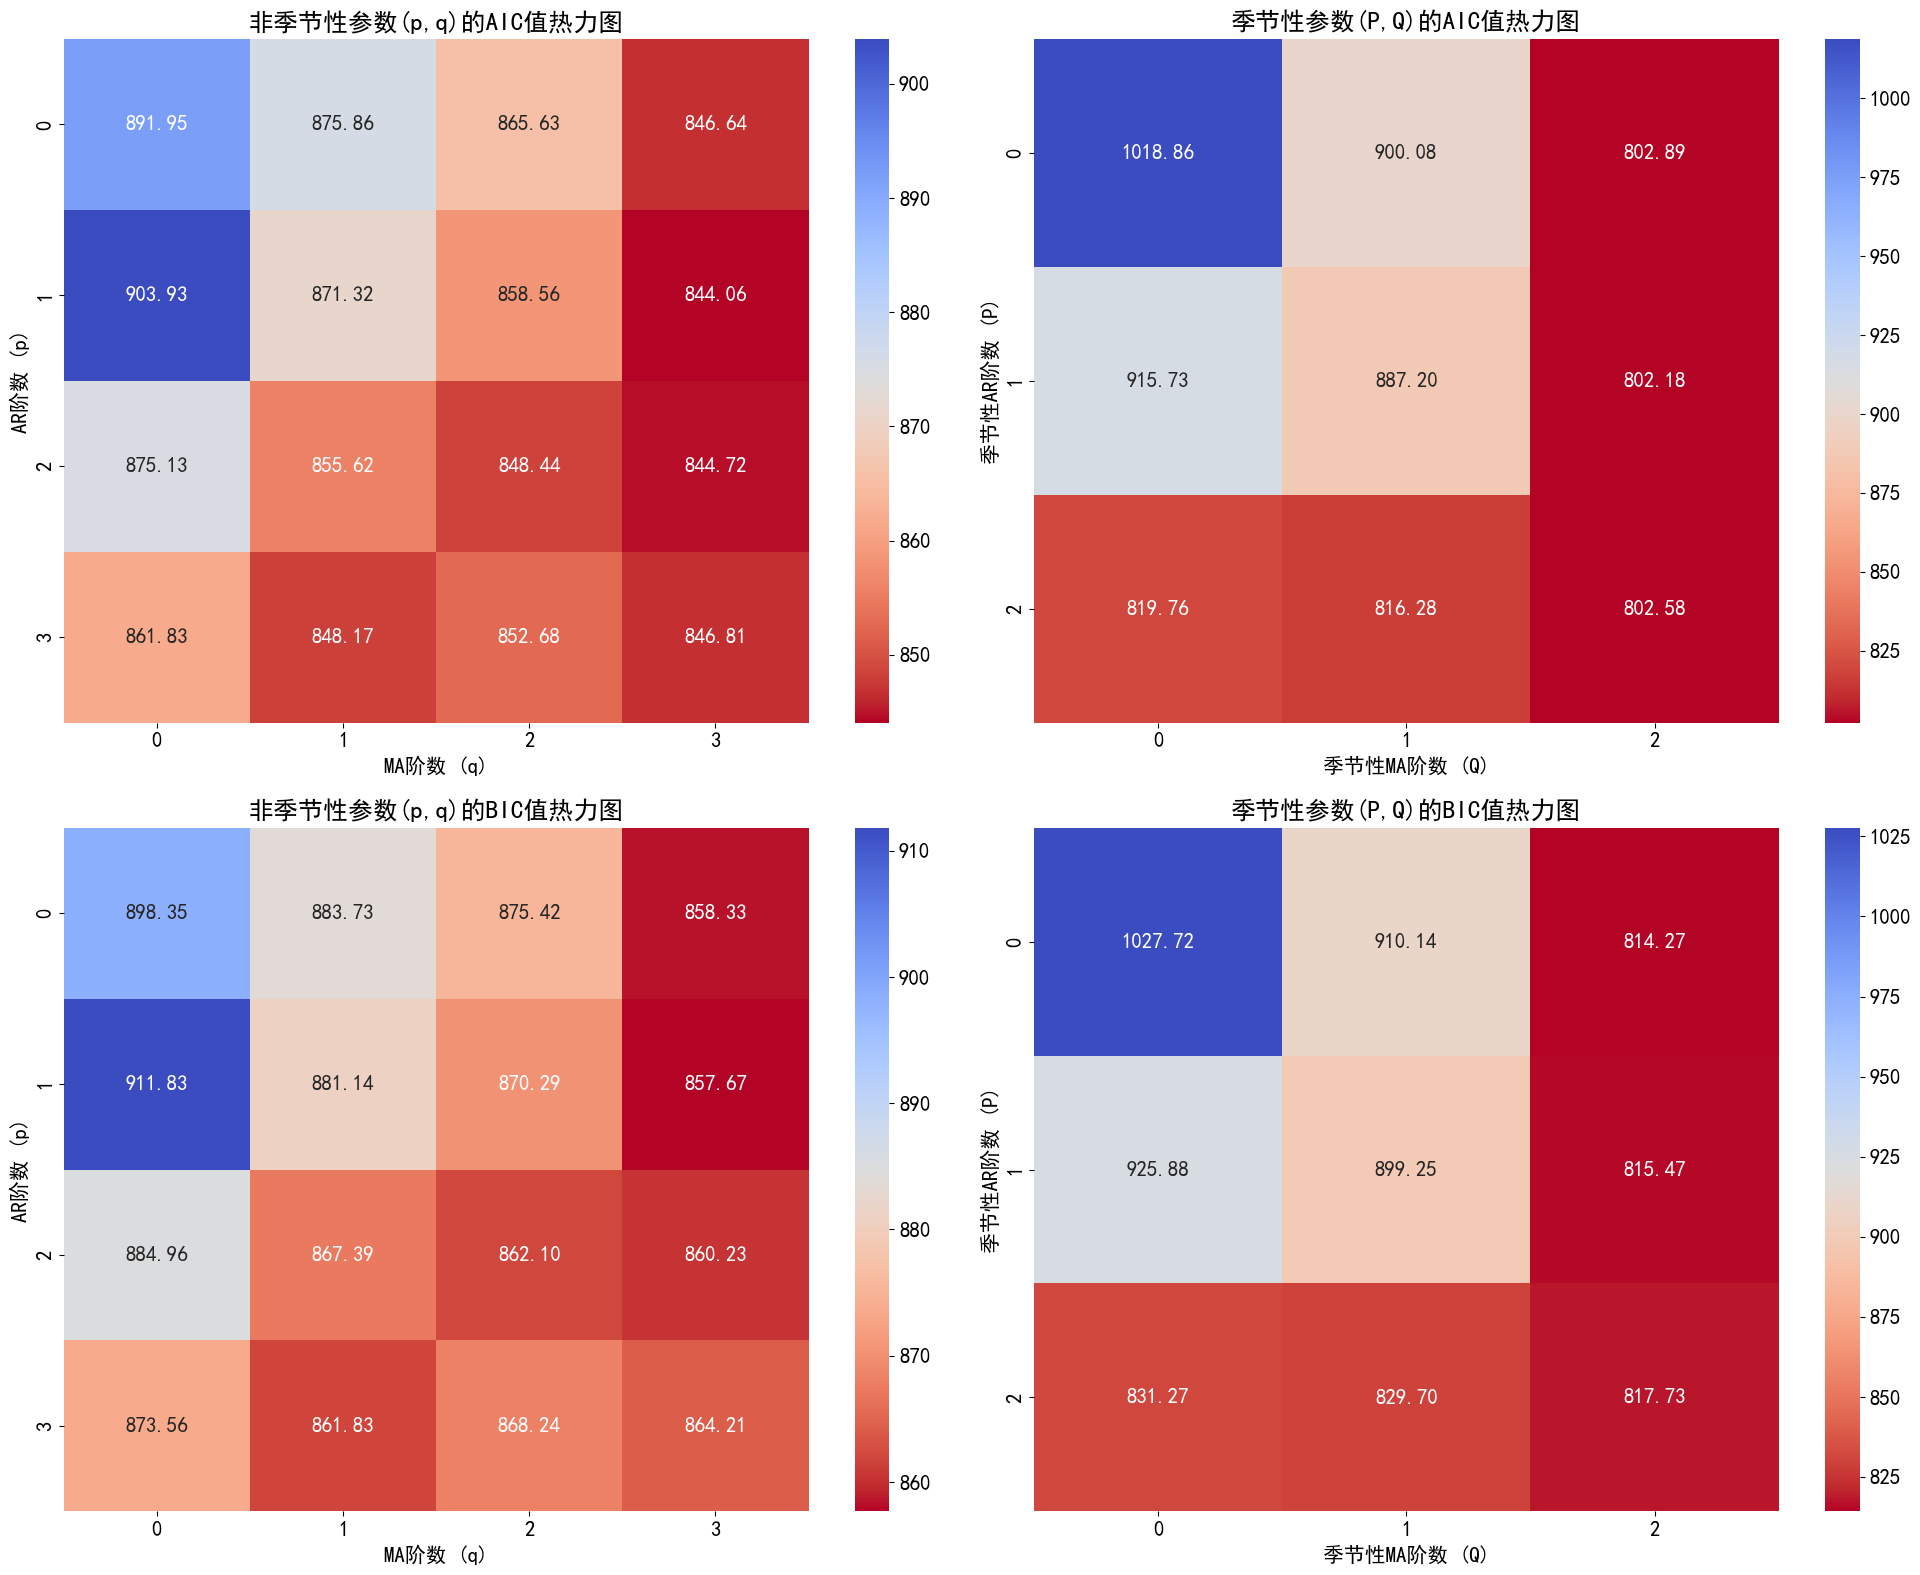


基于AIC的最佳SARIMA模型: SARIMA(0,2,3)x(1,1,2,6)
AIC值: 766.5764

基于BIC的最佳SARIMA模型: SARIMA(0,2,3)x(1,1,2,6)
BIC值: 779.6748

AIC和BIC选择了相同的模型参数


In [636]:
# 修改函数中的滞后阶数
def determine_sarima_orders(data, d=2, D=1, s=12, max_p=3, max_q=3, max_P=2, max_Q=2):
    """
    通过ACF和PACF图确定SARIMA模型的阶数
    
    参数:
    data: 时间序列数据
    d: 非季节性差分阶数，默认为2
    D: 季节性差分阶数，默认为1
    s: 季节周期，默认为12
    max_p, max_q, max_P, max_Q: 各阶数的最大值
    
    返回:
    推荐的p, q, P, Q值和对应的AIC值以及BIC值
    """
    # 进行差分处理
    diff_data = data.copy()
    # 非季节性差分
    for i in range(d):
        diff_data = diff_data.diff().dropna()
    # 季节性差分
    for i in range(D):
        diff_data = diff_data.diff(s).dropna()
    
    # 计算最大可用滞后阶数（不超过样本大小的70%）
    max_lags = min(20, int(len(diff_data) * 0.7) - 1)
    
    # 绘制ACF和PACF图
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 非季节性ACF
    plot_acf(diff_data, lags=max_lags, ax=axes[0])
    axes[0].set_title('ACF')
    
    # 非季节性PACF
    plot_pacf(diff_data, lags=max_lags, ax=axes[1])
    axes[1].set_title('PACF')
    plt.savefig(f'F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\ACFandPACF.png')
    plt.tight_layout()
    plt.show()
    
    # 根据ACF和PACF图进行初步判断
    acf_values = acf(diff_data, nlags=max_lags)
    pacf_values = pacf(diff_data, nlags=max_lags)
    
    # 计算显著性界限
    significance_level = 1.96/np.sqrt(len(diff_data))
    
    # 非季节性部分
    # 判断ACF的截尾情况
    q_suggested = 0
    for i in range(1, min(max_q + 1, len(acf_values))):
        if abs(acf_values[i]) > significance_level:
            q_suggested = i
        else:
            break
    
    # 判断PACF的截尾情况
    p_suggested = 0
    for i in range(1, min(max_p + 1, len(pacf_values))):
        if abs(pacf_values[i]) > significance_level:
            p_suggested = i
        else:
            break

    print(f"根据ACF和PACF图的初步判断：")
    print(f"非季节性部分：p = {p_suggested}, q = {q_suggested}")
    
    # 使用网格搜索找到最佳参数
    print("\n使用AIC和BIC准则进行网格搜索以确定最佳参数...")
    
    # 设置参数范围
    p_range = range(0, max_p + 1)
    q_range = range(0, max_q + 1)
    P_range = range(0, max_P + 1)
    Q_range = range(0, max_Q + 1)
    
    best_aic = float('inf')
    best_bic = float('inf')
    best_params_aic = None
    best_params_bic = None
    results = []
    
    # 网格搜索
    for p, q, P, Q in product(p_range, q_range, P_range, Q_range):
        # 跳过一些不合理的参数组合
        if p == 0 and q == 0 and P == 0 and Q == 0:
            continue
            
        try:
            model = SARIMAX(
                data,
                order=(p, d, q),
                seasonal_order=(P, D, Q, s),
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            
            model_fit = model.fit(disp=False)
            aic = model_fit.aic
            bic = model_fit.bic
            
            # 记录结果
            results.append([p, q, P, Q, aic, bic])
            
            # 更新最佳AIC参数
            if aic < best_aic:
                best_aic = aic
                best_params_aic = (p, d, q, P, D, Q, s)
                
            # 更新最佳BIC参数
            if bic < best_bic:
                best_bic = bic
                best_params_bic = (p, d, q, P, D, Q, s)
                
            print(f'SARIMA({p},{d},{q})x({P},{D},{Q},{s}) - AIC:{aic:.4f}, BIC:{bic:.4f}')
        except:
            continue
    
    # 将结果转换为DataFrame并排序
    results_df = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'AIC', 'BIC'])
    
    # 显示前10个最佳模型（按AIC排序）
    print("\n前10个最佳模型（按AIC排序）:")
    print(results_df.sort_values('AIC').head(10))
    
    # 显示前10个最佳模型（按BIC排序）
    print("\n前10个最佳模型（按BIC排序）:")
    print(results_df.sort_values('BIC').head(10))
    
    # 绘制热力图
    if len(results_df) > 0:
        try:
            import seaborn as sns
            
            # 创建一个2x2的子图布局
            fig, axes = plt.subplots(2, 2, figsize=(20, 16))
            
            # 非季节性参数热力图 (AIC)
            pivot_table_aic = results_df.pivot_table(
                index='p', columns='q', values='AIC', aggfunc='mean'
            )
            sns.heatmap(pivot_table_aic, annot=True, fmt='.2f', cmap='coolwarm_r', ax=axes[0, 0])
            axes[0, 0].set_title('非季节性参数(p,q)的AIC值热力图')
            axes[0, 0].set_xlabel('MA阶数 (q)')
            axes[0, 0].set_ylabel('AR阶数 (p)')
            
            # 季节性参数热力图 (AIC)
            pivot_table_aic_s = results_df.pivot_table(
                index='P', columns='Q', values='AIC', aggfunc='mean'
            )
            sns.heatmap(pivot_table_aic_s, annot=True, fmt='.2f', cmap='coolwarm_r', ax=axes[0, 1])
            axes[0, 1].set_title('季节性参数(P,Q)的AIC值热力图')
            axes[0, 1].set_xlabel('季节性MA阶数 (Q)')
            axes[0, 1].set_ylabel('季节性AR阶数 (P)')
            
            # 非季节性参数热力图 (BIC)
            pivot_table_bic = results_df.pivot_table(
                index='p', columns='q', values='BIC', aggfunc='mean'
            )
            sns.heatmap(pivot_table_bic, annot=True, fmt='.2f', cmap='coolwarm_r', ax=axes[1, 0])
            axes[1, 0].set_title('非季节性参数(p,q)的BIC值热力图')
            axes[1, 0].set_xlabel('MA阶数 (q)')
            axes[1, 0].set_ylabel('AR阶数 (p)')
            
            # 季节性参数热力图 (BIC)
            pivot_table_bic_s = results_df.pivot_table(
                index='P', columns='Q', values='BIC', aggfunc='mean'
            )
            sns.heatmap(pivot_table_bic_s, annot=True, fmt='.2f', cmap='coolwarm_r', ax=axes[1, 1])
            axes[1, 1].set_title('季节性参数(P,Q)的BIC值热力图')
            axes[1, 1].set_xlabel('季节性MA阶数 (Q)')
            axes[1, 1].set_ylabel('季节性AR阶数 (P)')
            
            plt.savefig(f'F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\热力图.png')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"绘制热力图时出错: {e}")
    
    # 返回最佳参数
    if best_params_aic and best_params_bic:
        p_aic, d_aic, q_aic, P_aic, D_aic, Q_aic, s_aic = best_params_aic
        p_bic, d_bic, q_bic, P_bic, D_bic, Q_bic, s_bic = best_params_bic
        
        print(f"\n基于AIC的最佳SARIMA模型: SARIMA({p_aic},{d_aic},{q_aic})x({P_aic},{D_aic},{Q_aic},{s_aic})")
        print(f"AIC值: {best_aic:.4f}")
        
        print(f"\n基于BIC的最佳SARIMA模型: SARIMA({p_bic},{d_bic},{q_bic})x({P_bic},{D_bic},{Q_bic},{s_bic})")
        print(f"BIC值: {best_bic:.4f}")
        
        # 比较AIC和BIC选择的模型
        if best_params_aic == best_params_bic:
            print("\nAIC和BIC选择了相同的模型参数")
        else:
            print("\nAIC和BIC选择了不同的模型参数")
            print("BIC通常倾向于更简约的模型，而AIC可能选择更复杂的模型")
        
        # 返回两种准则下的最佳参数
        return p_aic, q_aic, P_aic, Q_aic, best_aic, p_bic, q_bic, P_bic, Q_bic, best_bic
    else:
        print("\n未找到合适的模型")
        return None

# 调用函数
p_aic, q_aic, P_aic, Q_aic, aic, p_bic, q_bic, P_bic, Q_bic, bic = determine_sarima_orders(flow_data, d=2, D=1, s=6)

                                       SARIMAX Results                                        
Dep. Variable:                               流量(m3/s)   No. Observations:                   72
Model:             SARIMAX(0, 2, 3)x(1, 1, [1, 2], 6)   Log Likelihood                -504.099
Date:                                Thu, 24 Apr 2025   AIC                           1022.197
Time:                                        20:03:25   BIC                           1037.310
Sample:                                             0   HQIC                          1028.151
                                                 - 72                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9812     22.509     -0.044      0.965     -45.098      43.136
ma.

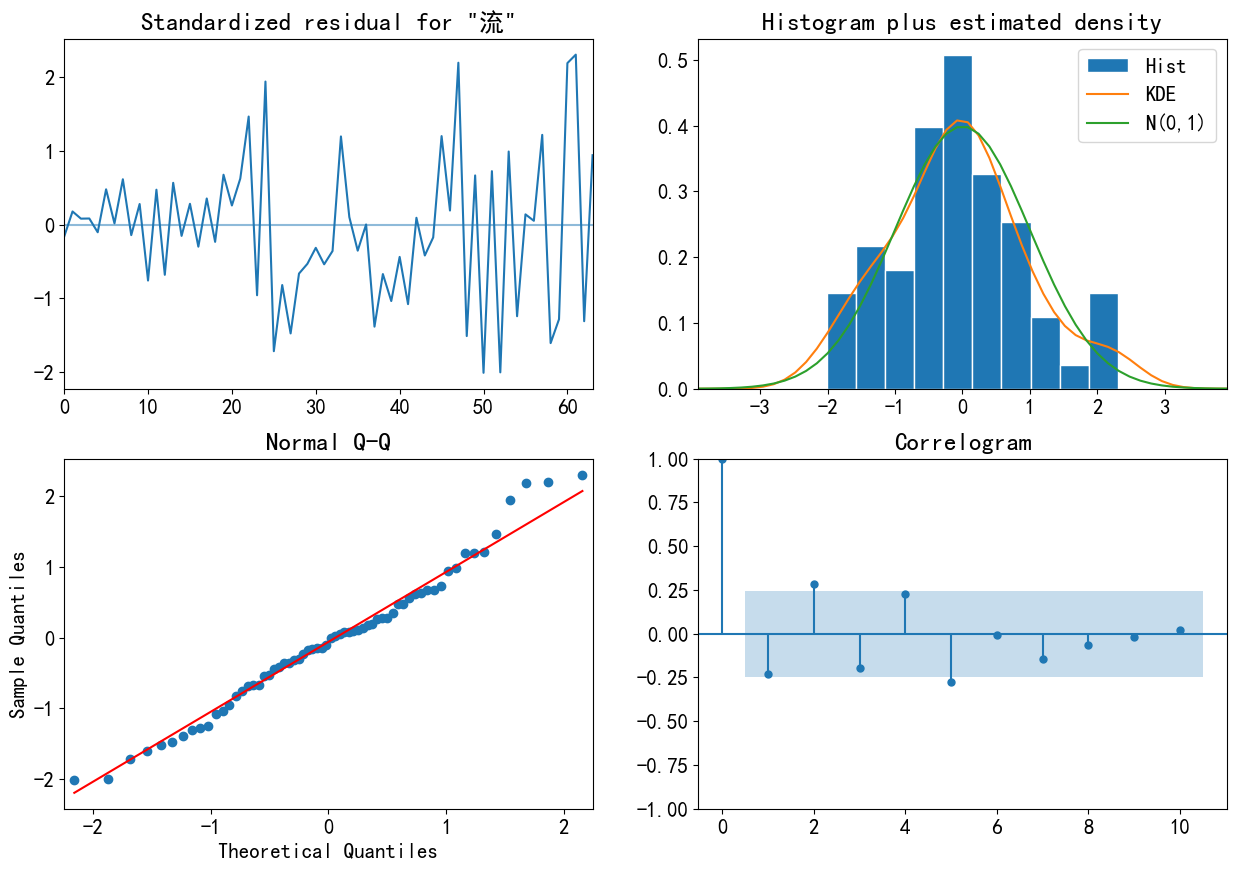

In [637]:
# 模型诊断
best_mod = sm.tsa.statespace.SARIMAX(flow_data, order=(0,2,3), seasonal_order=(1,1,2,6))
results = best_mod.fit() # 拟合模型，使用最大似然估计法估计模型参数
print(results.summary())  # 输出模型摘要
results.plot_diagnostics(figsize=(15, 10)) # 绘制诊断图
plt.savefig(f'F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\模型诊断图.png')
plt.show()


### 摘要解释:
         Dep. Variable : 流量(m3/s) 因变量是流量，单位为立方米每秒
         Model : 模型类型
         No. Observations :  使用观测值的数量
         Log Likelihood :  对数似然值，用于评估模型拟合度
         AIC : 赤池信息准则，越小越好
         BIC : 贝叶斯信息准则，越小越好
         HQIC : 汉奎因信息准则，越小越好
         ma.L1, ma.L2, ma.L3 : 非季节性移动平均项的系数（对应q=3）
         ar.S.L6 : 季节性自回归项的系数（对应P=1）
         ma.S.L6, ma.S.L12 : 季节性移动平均项的系数（对应Q=[1,2]）
         sigma2 : 残差方差
         coef : 系数估计值
         std err : 标准误差
         z : z统计量
         P>|z| : p值，小于0.05表示在5%显著性水平下显著
         [0.025, 0.975] : 95%置信区间
         LjunBox (L1) (Q) : 3.56，p=0.06 残差自相关检验，p>0.05表示残差没有显著自相关
         JarquBera (JB) : 0.85，p=0.65 正态性检验，p>0.05表示残差近似正态分布
         Heteroskedasticity (H) : 11.86，p=0.00 异方差检验，p<0.05表示存在异方差性
         Skew : 0.28 偏度，接近0表示分布近似对称
         Kurtosis : 2.95 峰度，接近3表示分布峰度接近正态分布

In [638]:
# dw检验方法进行模型检验
residuals = results.resid
dw_test = sm.stats.stattools.durbin_watson(residuals)
print('dw检验',dw_test)
if 1.5 <= dw_test <= 2.5:
    print("模型拟合效果良好，不存在自相关性")


dw检验 2.4559842269529475
模型拟合效果良好，不存在自相关性


### 3.1.2 预测该水文站未来两年水沙通量的变化趋势
- 划分训练集和测试集进行预测

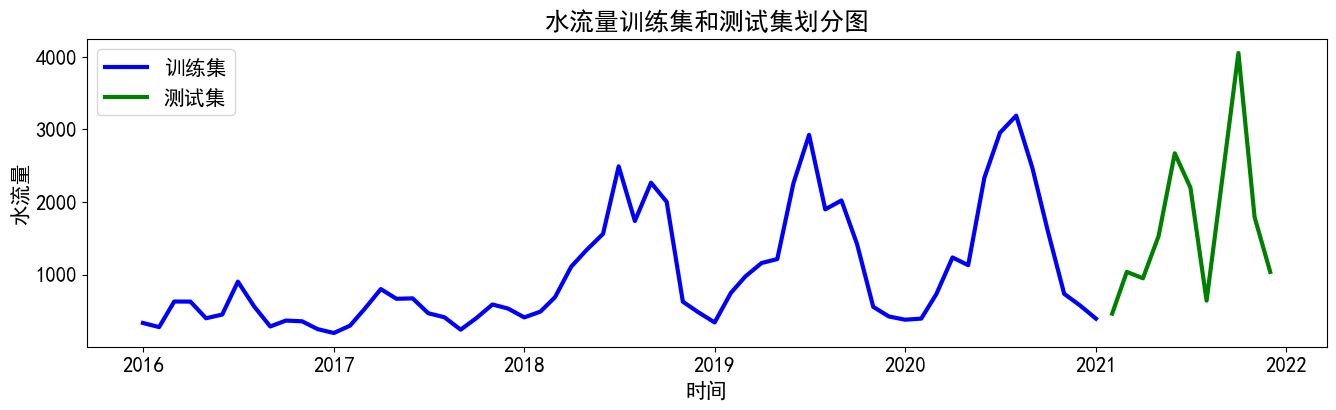

预测值=269.06, 实际值=461.05
预测值=971.87, 实际值=1036.64
预测值=1633.27, 实际值=948.66
预测值=1027.09, 实际值=1531.05
预测值=2649.13, 实际值=2670.95
预测值=3286.02, 实际值=2198.29
预测值=2142.92, 实际值=640.39
预测值=736.44, 实际值=2370.89
预测值=2199.93, 实际值=4053.19
预测值=2148.06, 实际值=1792.35
预测值=1141.75, 实际值=1036.03


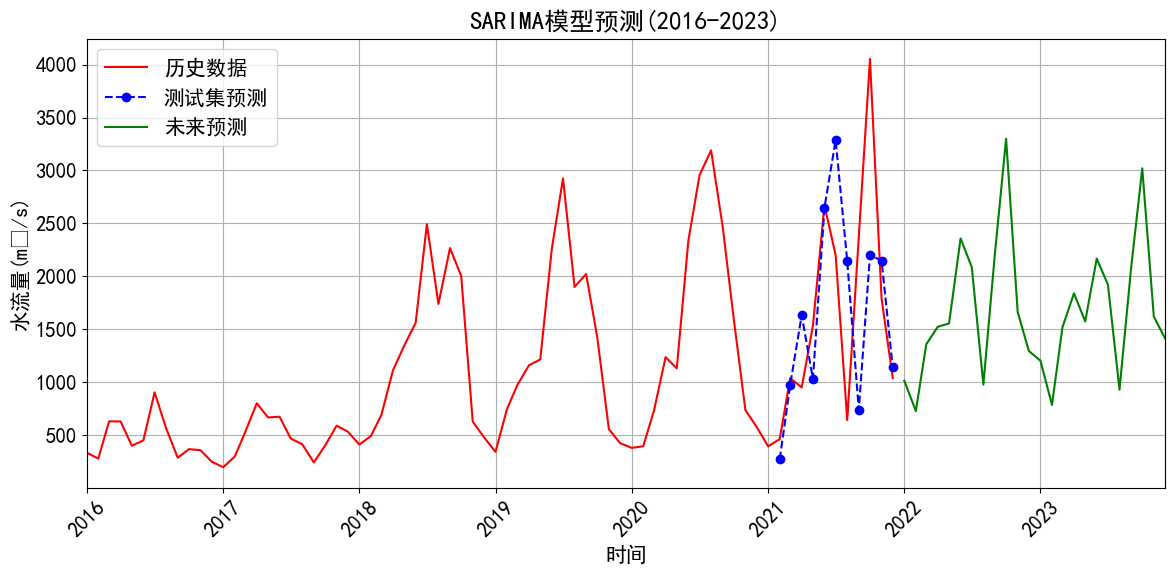

<Figure size 1000x1000 with 0 Axes>

In [639]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
from dateutil.relativedelta import relativedelta

# 将数据转换为时间序列格式
ts_data = df3.astype('float32')

# 创建正确的日期索引（2016-2021）
date_range = pd.date_range(start='2016-01-01', end='2021-12-31', freq='MS')
ts_data_with_date = pd.Series(ts_data.values.flatten(), index=date_range[:len(ts_data)])

# 划分训练集和测试集（前60个月作为训练集，后12个月作为测试集）
train_size = int(len(ts_data) * 0.85)  
train_data, test_data = ts_data_with_date[:train_size], ts_data_with_date[train_size:]

# 可视化训练集和测试集
plt.figure(figsize=(16,4))
plt.title('水流量训练集和测试集划分图')
plt.xlabel('时间')
plt.ylabel('水流量')
plt.plot(train_data, 'b', label='训练集',linewidth=3)
plt.plot(test_data, 'g', label='测试集',linewidth=3)
font = {'serif': 'Times New Roman','size': 15}
plt.rc('font', **font)
plt.legend()
plt.savefig('F:\my _file\全国大学生数学建模大赛\CUMCM2023\E题/train_test'+'_flow'+'.png')
plt.show()

# 将训练集和测试集转换为数组
train_ar = train_data.values
test_ar = test_data.values

# 构建训练数据
history = [x for x in train_ar]
predictions = list()

# 训练SARIMA模型并进行滚动预测
for t in range(len(test_ar)):
    # 使用SARIMAX模型，参数为(0,2,3)(1,1,2,6)
    model = sm.tsa.SARIMAX(history, order=(0,2,3), seasonal_order=(1,1,2,6),
                          enforce_invertibility=False, enforce_stationarity=False)
    model_fit = model.fit(disp=False)  # 设置disp=False减少输出
    output = model_fit.forecast()  # 预测下一个值
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    print(f'预测值={yhat:.2f}, 实际值={obs:.2f}')

# # 评估模型性能
# testScore = math.sqrt(mean_squared_error(test_ar, predictions))
# print('均方根误差(RMSE): %.3f' % testScore)
# testScore = r2_score(test_ar, predictions)
# print('决定系数(R2): %.3f' % testScore)
# testScore = mean_absolute_error(test_ar, predictions)
# print('平均绝对误差(MAE): %.3f' % testScore)

# 使用最终模型对未来两年进行预测
# 使用全部数据拟合最终模型
final_model = sm.tsa.SARIMAX(ts_data_with_date, order=(0,2,3), seasonal_order=(1,1,2,6),
                           enforce_invertibility=False, enforce_stationarity=False)
final_results = final_model.fit(disp=False)

# 预测未来24个月
forecast_steps = 24
pred_uc = final_results.get_forecast(steps=forecast_steps, alpha=0.05)
pred_mean = pred_uc.predicted_mean
pred_ci = pred_uc.conf_int()

# 创建预测日期索引（2022-2023）
last_date = ts_data_with_date.index[-1]
forecast_dates = pd.date_range(start=last_date + relativedelta(months=1), periods=forecast_steps, freq='MS')

# 将预测结果转换为Series，带有日期索引
pred_mean_with_date = pd.Series(pred_mean, index=forecast_dates)

# 绘制结果
plt.figure(figsize=(12,6))
# 绘制历史数据
plt.plot(ts_data_with_date.index, ts_data_with_date, color='red', label='历史数据')
# 绘制测试集预测
test_predictions = pd.Series(predictions, index=test_data.index)
plt.plot(test_predictions.index, test_predictions, color='blue', marker='o', linestyle='dashed', label='测试集预测')
# 绘制未来预测
plt.plot(pred_mean_with_date.index, pred_mean_with_date, color='green', label='未来预测')


# 设置图表属性
plt.title('SARIMA模型预测(2016-2023)')
plt.xlabel('时间')
plt.ylabel('水流量(m³/s)')
plt.legend()
plt.grid(True)
# 设置x轴范围
plt.xlim(ts_data_with_date.index[0], forecast_dates[-1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('F:\\vscode_code\E2023\\2023_CUMCM_E-main\结果保存\\pre'+'_twoyears'+'.png')
plt.show()

plt.tight_layout()
plt.show()

# 问题四
## 根据该水文站的水沙通量和河底高程的变化情况，分析每年 6-7 月小浪底水库进行“调水调沙”的实际效果。如果不进行“调水调沙”，10 年以后该水文站的河底高程会如何？
### 4.1.1 绘制月流量和排沙量变化趋势图
- 通过月流量和排沙量变化趋势，分析调水调沙的实际效果

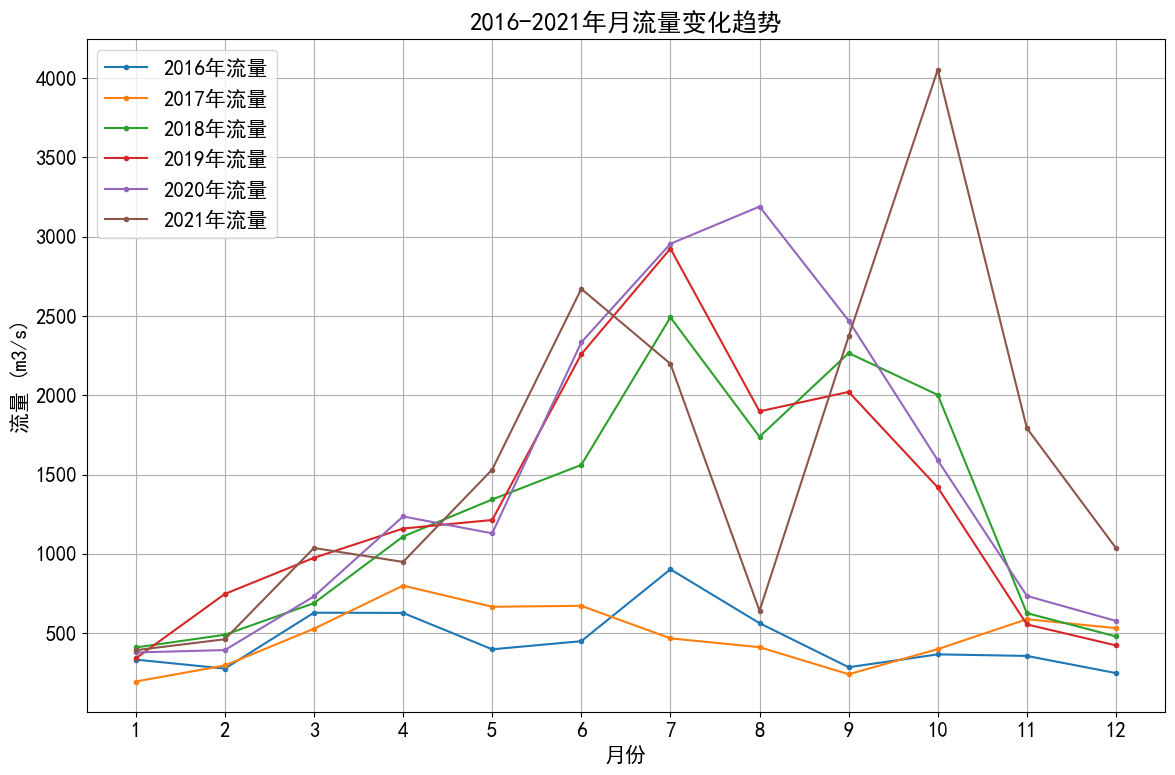

In [640]:
# 创建图表
plt.figure(figsize=(12, 8))

# 绘制每一年的月均流量和含沙量
for year in range(2016, 2022):
    # 过滤特定年份的数据
    year_data = monthly_data.loc[year]
    
    # 绘制月均流量
    plt.plot(year_data.index, year_data['流量(m3/s)'], marker='.', 
            label=f'{year}年流量')
# 添加标题和标签
plt.title('2016-2021年月流量变化趋势')
plt.xlabel('月份')
plt.ylabel('流量 (m3/s)')
plt.xticks(range(1, 13))  # 设置x轴显示1-12月

# 添加图例
plt.legend()

# 显示图表
plt.grid(True)
plt.tight_layout()
plt.savefig('F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\月流量变化趋势')
plt.show()

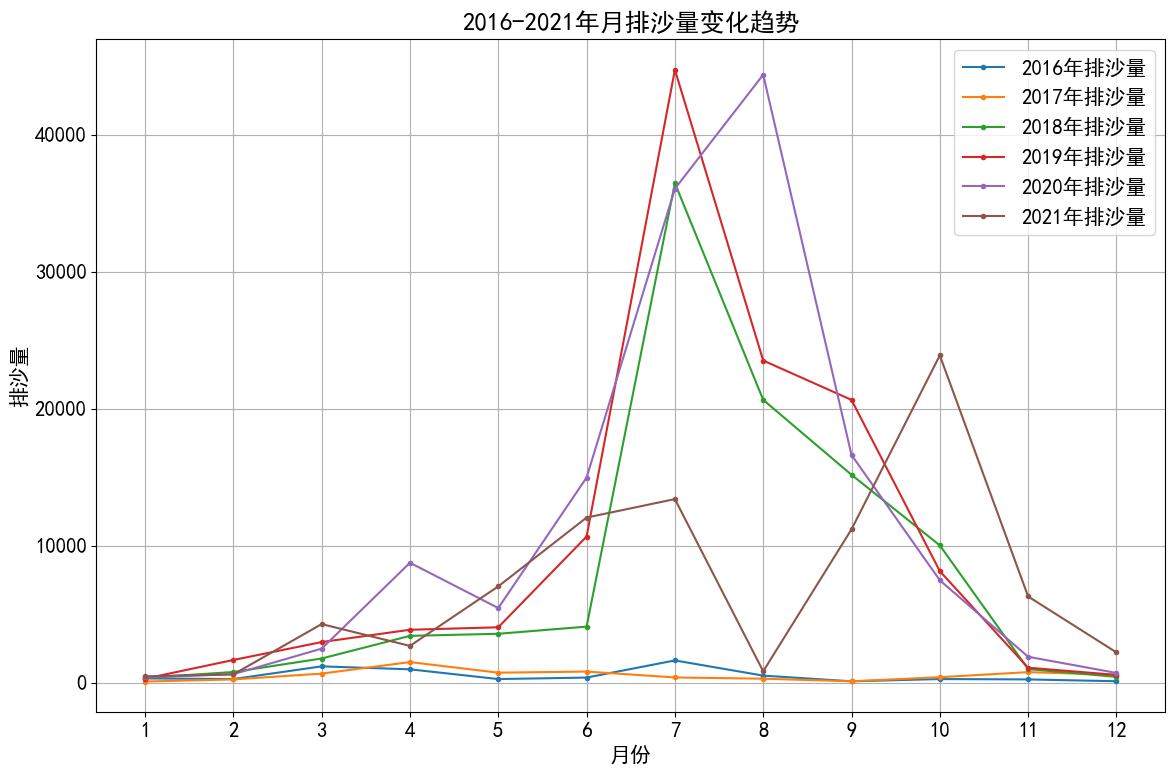

In [ ]:

# 创建图表
plt.figure(figsize=(12, 8))

# 绘制每一年的月均流量和含沙量
for year in range(2016, 2022):
    # 过滤特定年份的数据
    year_data = monthly_data.loc[year]
    
    # 绘制月均排沙量
    plt.plot(year_data.index, year_data['月均排沙量'], marker='.', 
            label=f'{year}年排沙量')
    

# 添加标题和标签
plt.title('2016-2021年月排沙量变化趋势')
plt.xlabel('月份')
plt.ylabel('排沙量')
plt.xticks(range(1, 13))  # 设置x轴显示1-12月

# 添加图例
plt.legend()

# 显示图表
plt.grid(True)
plt.tight_layout()
plt.savefig('F:\\vscode_code\\E2023\\2023_CUMCM_E-main\\结果保存\\排沙量变化趋势')
plt.show()